# Start

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({
          'font.size': 20,
          'figure.figsize': (16, 9),
          'axes.grid': False,
          'grid.linestyle': '-',
          'grid.alpha': 0.2,
          'lines.markersize': 5.0,
          'xtick.minor.visible': True,
          'xtick.direction': 'in',
          'xtick.major.size': 10.0,
          'xtick.minor.size': 5.0,
          'xtick.top': True,
          'ytick.minor.visible': True,
          'ytick.direction': 'in',
          'ytick.major.size': 10.0,
          'ytick.minor.size': 5.0,
          'ytick.right': True,
          'errorbar.capsize': 0.0,
          'figure.max_open_warning': 50,
})

In [2]:
from cycler import cycler  # Permette di impostare cicli di colori

# Ottieni i colori dalla palette Pastel1
pastel_colors = plt.get_cmap("Set2").colors

# Imposta lo stile dei colori per tutti i plot
plt.rcParams["axes.prop_cycle"] = cycler(color=pastel_colors)

In [3]:
from __init__ import * 

In [4]:
import yaml

In [5]:
from PIL import Image

In [6]:
import wesanderson

['#DD8D29', '#E2D200', '#46ACC8', '#E58601', '#B40F20']


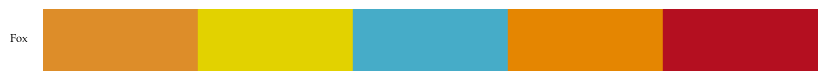

In [7]:
film = 'Fox'
number = 0
palettes = wesanderson.film_palette(
film = film,
palette = number
)
print(palettes)
fig, ax = plt.subplots(figsize=(10, 1 * 0.8))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Disegna le palette di colori
y = 0
x = 0
width = 1 / len(palettes)
for color in palettes:
    ax.add_patch(plt.Rectangle((x, y), width, 1, color=color))
    x += width
ax.text(-0.02, y + 0.5, film, va='center', ha='right', fontsize=8)
y -= 1

# Nasconde gli assi
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show() 


In [8]:
wesanderson.film_palette(
film = film,
palette = number
)

['#DD8D29', '#E2D200', '#46ACC8', '#E58601', '#B40F20']

In [9]:
crystal = 'BGO'
beam = 'e'
beam_text = r'$e^+$' if beam == 'e' else r'$\mu^+$'

In [10]:
with open('yaml/data.yaml', 'r') as file:
    runs_info = yaml.safe_load(file)

In [11]:
angles = np.array(list(runs_info[crystal][beam].keys()))

In [12]:
ch = 2

In [13]:
laser = True

In [14]:
name_piece = 'Hardware' if not laser else 'fromLaser'

In [15]:
color = {'BGO': palettes[0], 'BSO': palettes[4]}

In [16]:
conversion_factor = {'BSO': 2.08e+3, 'BGO': 9.0e+3}

In [17]:
crystals = ['BGO', 'BSO']

In [18]:
'''

df = {}
df[1] = {}
df[2] = {}
d = {}
crystals = ['BGO', 'BSO']
for crystal in crystals:
    df[1][crystal] = {}
    df[2][crystal] = {}
    d[crystal] = {}
    
for crystal in crystals:
    for ch in [1, 2]:
        for angle in angles: 
            #if angle == 110 or angle == 130: 
            #    continue
            #supps = 180-angle
            #if angle == 0 and crystal == 'BSO': 
            #    continue
            df[ch][crystal][angle] = pd.read_parquet(f'Hardware_Fit/parqs/FitInfo_{name_piece}_{crystal}_{beam}_{angle}_Ch{ch}.parq')
            
            #if angle != 110 and angle != 130:
            #    pq_sim = pd.read_parquet(f'Hardware_Fit/parqs/e_BGO_1k_{angle}.parq')
            #    Ecalo = np.mean(pq_sim['Ecalo'])/1000
            #    df[ch][crystal][angle]['c_over_Ecalo'] = df[ch][crystal][angle]['c'] / Ecalo
            #df[ch][crystal][angle]['c_over_s'] = df[ch][crystal][angle]['c'] / df[ch][crystal][angle]['s']
            #df[ch][crystal][angle]['c_over_s_err'] = df[ch][crystal][angle]['c_over_s'] * np.sqrt((df[ch][crystal][angle]['errc'] / df[ch][crystal][angle]['c'])**2 + (df[ch][crystal][angle]['errs'] / df[ch][crystal][angle]['s'])**2)
            
            
for crystal in crystals:
    for angle in angles: 
        #if angle == 110 or angle == 130: 
        #    continue
        #supps = 180-angle
        d[crystal][angle] = pd.merge(df[2][crystal][angle], df[1][crystal][angle], on='__event__', how='inner', suffixes=('_sipm_c', '_sipm_s'))
        d[crystal][angle]['e'] = d[crystal][angle]['s_sipm_s']/conversion_factor[crystal]
        d[crystal][angle]['de'] = d[crystal][angle]['errs_sipm_s']/conversion_factor[crystal]
        d[crystal][angle]['c_over_e'] = d[crystal][angle]['c_sipm_c']/d[crystal][angle]['e']
        d[crystal][angle]['c_over_s_sipm_c'] = d[crystal][angle]['c_sipm_c']/d[crystal][angle]['s_sipm_c']
        d[crystal][angle]['c_over_s_sipm_s'] = d[crystal][angle]['c_sipm_c']/d[crystal][angle]['s_sipm_s']
        d[crystal][angle]['s_s_over_s_c'] = d[crystal][angle]['s_sipm_s']/d[crystal][angle]['s_sipm_c']
        d[crystal][angle]['c_s_over_c_c'] = d[crystal][angle]['c_sipm_s']/d[crystal][angle]['c_sipm_c']
        d[crystal][angle]['c_sipm_s_over_s_sipm_s'] = d[crystal][angle]['c_sipm_s']/d[crystal][angle]['s_sipm_s']
        d[crystal][angle]['Q_data_sipm_s_Q_data_sipm_s'] = d[crystal][angle]['Q_data_sipm_s']/d[crystal][angle]['Q_data_sipm_c']
        if angle not in [110, 130]: 
            pq_sim = pd.read_parquet(f'Hardware_Fit/parqs/e_BGO_1k_{angle}.parq')
            dummy = np.mean(pq_sim['Ecalo']/1000)
            d[crystal][angle]['c_over_Esim'] = d[crystal][angle]['c_sipm_c']/dummy
            
        #    continue
        #for sipm in ['_sipm_c', '_sipm_s']:
        #    mean = np.mean(d[crystal][angle][f'ampl_sideband{sipm}'])
        #    std = np.std(d[crystal][angle][f'ampl_sideband{sipm}'])
        #    d[crystal][angle] = d[crystal][angle].query(f'amplitude{sipm} > {mean + 5*std}')
        d[crystal][angle].to_parquet(f'Hardware_Fit/parqs/FitInfo_{name_piece}_{crystal}_{beam}_{angle}_BothChs.parq')
           # df[ch][crystal][supps] = df[ch][crystal][supps].query('c_over_s > -2 and c_over_s < 10') 
           
'''

"\n\ndf = {}\ndf[1] = {}\ndf[2] = {}\nd = {}\ncrystals = ['BGO', 'BSO']\nfor crystal in crystals:\n    df[1][crystal] = {}\n    df[2][crystal] = {}\n    d[crystal] = {}\n    \nfor crystal in crystals:\n    for ch in [1, 2]:\n        for angle in angles: \n            #if angle == 110 or angle == 130: \n            #    continue\n            #supps = 180-angle\n            #if angle == 0 and crystal == 'BSO': \n            #    continue\n            df[ch][crystal][angle] = pd.read_parquet(f'Hardware_Fit/parqs/FitInfo_{name_piece}_{crystal}_{beam}_{angle}_Ch{ch}.parq')\n            \n            #if angle != 110 and angle != 130:\n            #    pq_sim = pd.read_parquet(f'Hardware_Fit/parqs/e_BGO_1k_{angle}.parq')\n            #    Ecalo = np.mean(pq_sim['Ecalo'])/1000\n            #    df[ch][crystal][angle]['c_over_Ecalo'] = df[ch][crystal][angle]['c'] / Ecalo\n            #df[ch][crystal][angle]['c_over_s'] = df[ch][crystal][angle]['c'] / df[ch][crystal][angle]['s']\n            #d

In [19]:
d = {}
for crystal in crystals:
    d[crystal] = {}
    for angle in angles:
        d[crystal][angle] = pd.read_parquet(f'Hardware_Fit/parqs/FitInfo_Lyso_fromLaser_{crystal}_{beam}_{angle}_BothChs.parq')

In [20]:
pq_sim = {}
for angle in angles: 
    if angle != 110 and angle != 130:
        pq_sim[angle] = pd.read_parquet(f'Hardware_Fit/parqs/OptOFF_spot1p5/e_BGO_10k_{angle}.parq')

In [21]:
pq_sim_1e3 = {}
for angle in angles: 
    if angle != 110 and angle != 130:
        pq_sim_1e3[angle] = pd.read_parquet(f'Hardware_Fit/parqs/OptOFF_1e3/e_BGO_10k_{angle}.parq')

In [22]:
d_filter = {}
for crystal in ['BSO', 'BGO']:
    d_filter[crystal] = {}
    for angle in angles:
        d_filter[crystal][angle] = d[crystal][angle]
        for sipm in ['_sipm_c', '_sipm_s']:
            d_filter[crystal][angle] = d_filter[crystal][angle].query(f'Q_data{sipm} > 0')
            d_filter[crystal][angle] = d_filter[crystal][angle].query(f'Q_fit{sipm} > 0')
            d_filter[crystal][angle] = d_filter[crystal][angle].query(f'Q_data{sipm}/Q_fit{sipm} < 1.25')
            d_filter[crystal][angle] = d_filter[crystal][angle].query(f'Q_data{sipm}/Q_fit{sipm} > 0.75')
            d_filter[crystal][angle][f'Q_data{sipm}_Q_fit{sipm}'] = d_filter[crystal][angle][f'Q_data{sipm}']/d_filter[crystal][angle][f'Q_fit{sipm}']
            d_filter[crystal][angle] = d_filter[crystal][angle].query(f't0{sipm} < 25')
            d_filter[crystal][angle] = d_filter[crystal][angle].query(f't0{sipm} > -50')
        d_filter[crystal][angle] = d_filter[crystal][angle].query(f'e < 10')
        d_filter[crystal][angle] = d_filter[crystal][angle].query(f'e > 0')
        d_filter[crystal][angle] = d_filter[crystal][angle].query(f'c_over_s_sipm_c < 10')
        d_filter[crystal][angle] = d_filter[crystal][angle].query(f'c_over_s_sipm_c > 0')
        d_filter[crystal][angle] = d_filter[crystal][angle].query(f'c_sipm_s < 1500')
        for sipm in ['_sipm_c', '_sipm_s']:
            mean = np.mean(d_filter[crystal][angle][f'ampl_sideband{sipm}'])
            std = np.std(d_filter[crystal][angle][f'ampl_sideband{sipm}'])
            d_filter[crystal][angle] = d_filter[crystal][angle].query(f'amplitude{sipm} > {mean + 5*std}')

# Efficiency Study

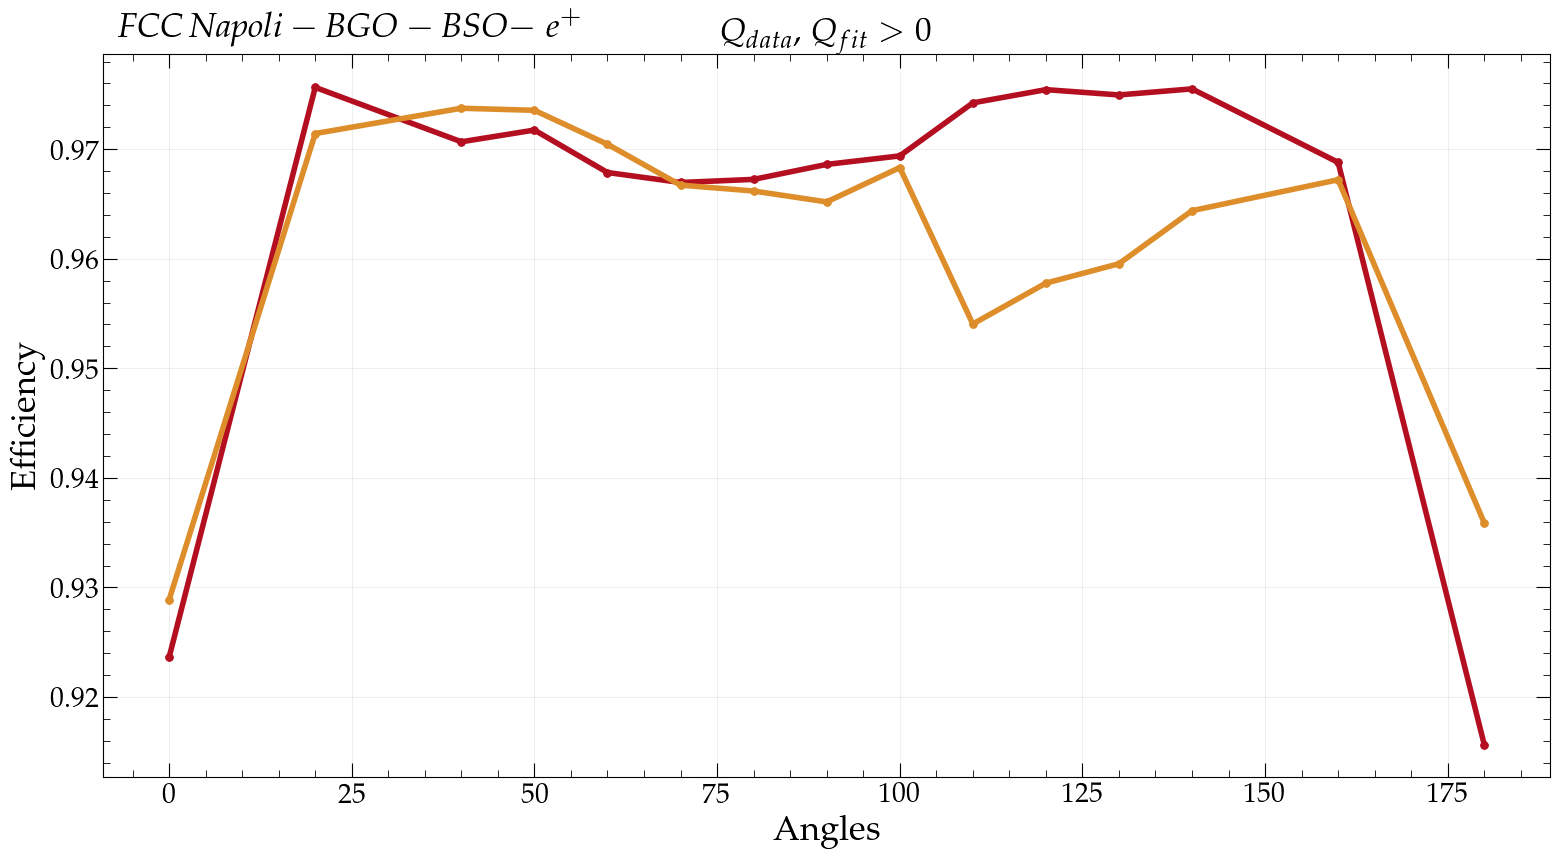

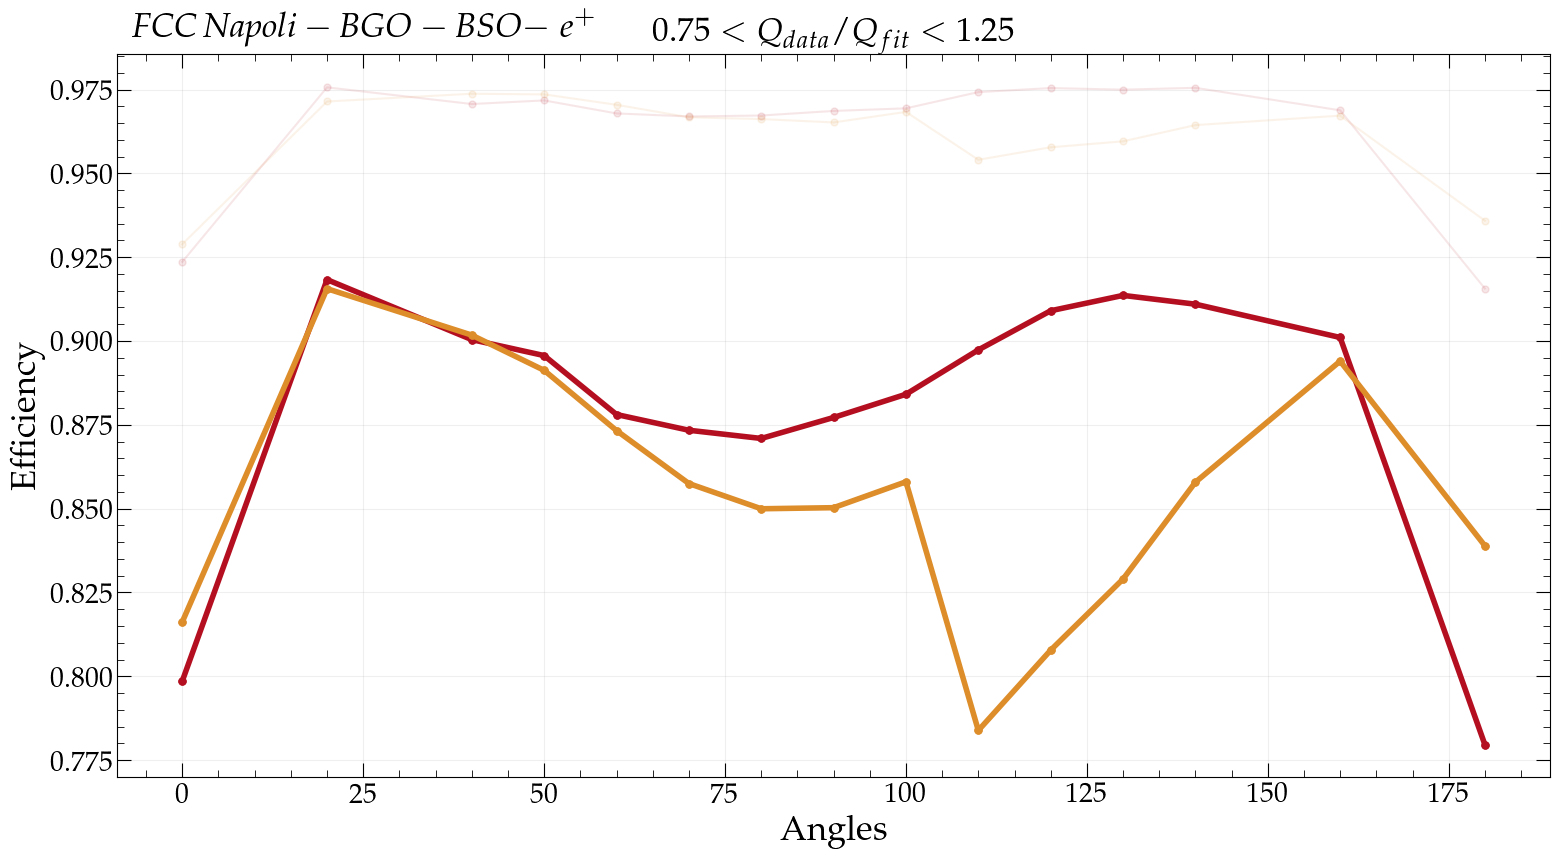

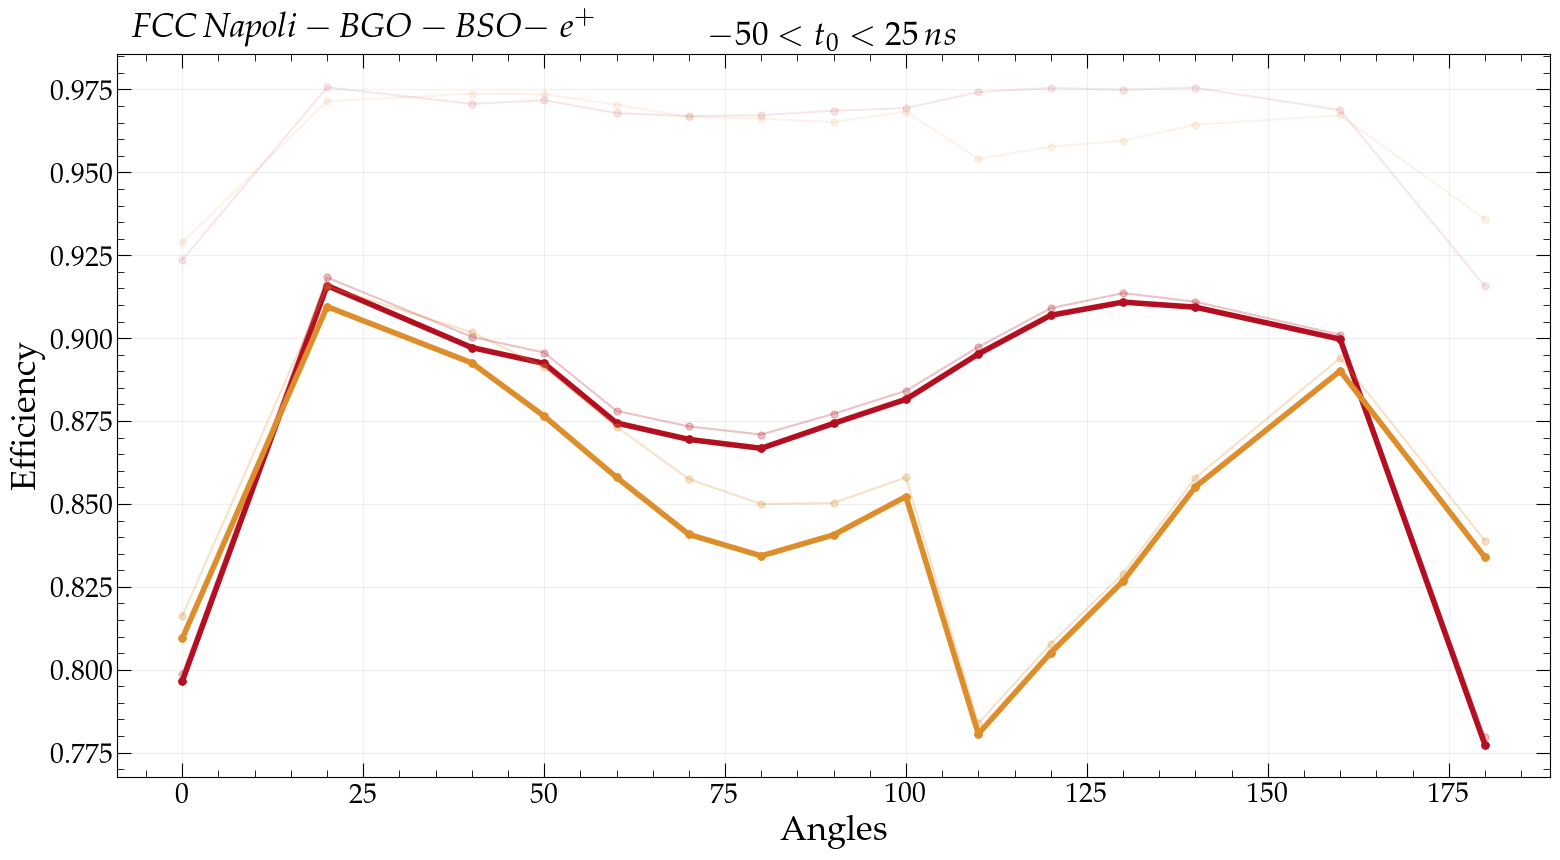

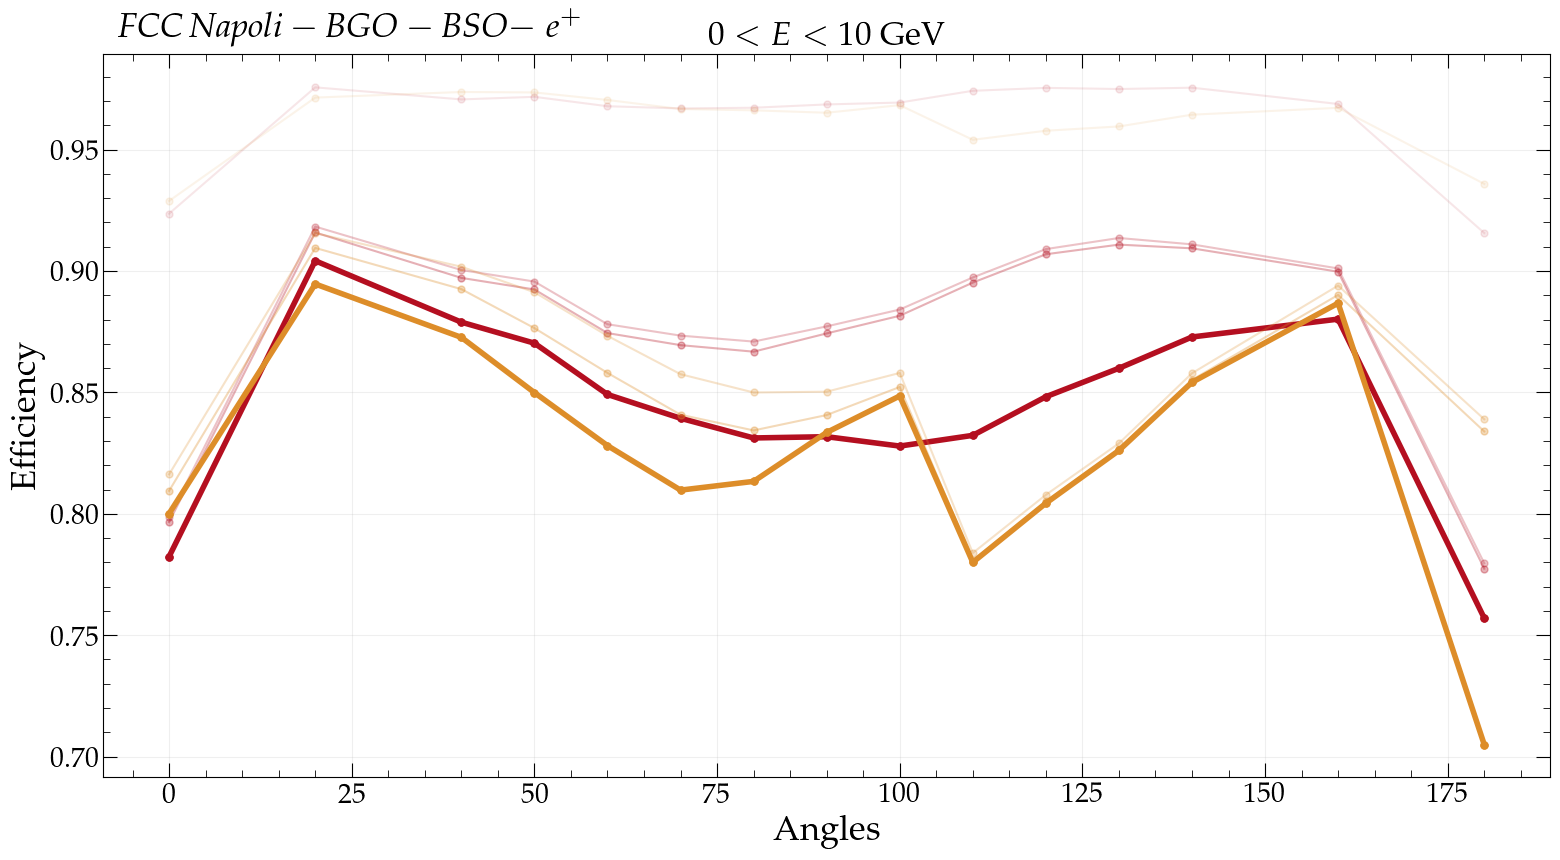

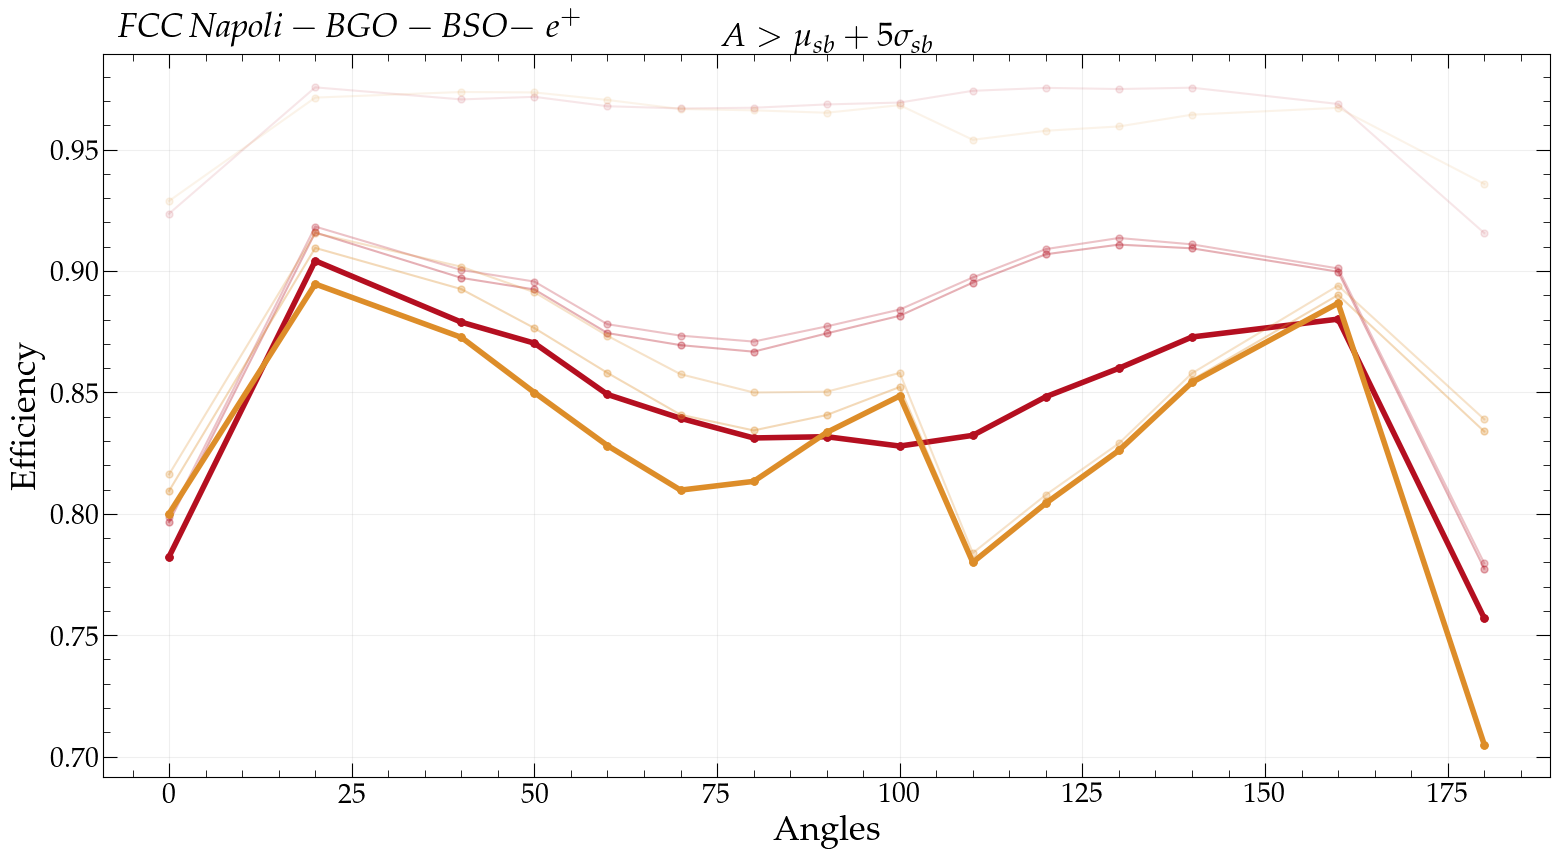

In [25]:
d_filter = {}
eff = {}
cuts_list = ['Q_geq_0', 'Q_fit_1', 'Not_in_time', 'Energy', 'Ampl']
title = {
    'Q_geq_0':r'$Q_{data}$, $Q_{fit} > 0$',
    'Q_fit_1':r'$0.75<Q_{data}/Q_{fit} < 1.25$',
    'Not_in_time':r'$-50 < t_0 <25\,ns$',
    'Energy': r'$0< E < 10$ GeV', 
    'Ampl': r'$A > \mu_{sb}+5\sigma_{sb}$'
}
palette = wesanderson.film_palette(film=film, palette=0)
for crystal in ['BSO', 'BGO']:
    d_filter[crystal] = {}
    eff[crystal] = {}
    for cut in cuts_list:
        eff[crystal][cut] = []
    for angle in angles:
        dummy = d[crystal][angle]
        for sipm in ['_sipm_c', '_sipm_s']:
            dummy = dummy.query(f'Q_data{sipm} > 0')
            dummy = dummy.query(f'Q_fit{sipm} > 0')
        eff[crystal]['Q_geq_0'].append(len(dummy)/len(d[crystal][angle]))
        for sipm in ['_sipm_c', '_sipm_s']:
            dummy = dummy.query(f'Q_data{sipm}/Q_fit{sipm} < 1.25')
            dummy = dummy.query(f'Q_data{sipm}/Q_fit{sipm} > 0.75')
        eff[crystal]['Q_fit_1'].append(len(dummy)/len(d[crystal][angle]))
        for sipm in ['_sipm_c', '_sipm_s']:
            dummy = dummy.query(f't0{sipm} < 25')
            dummy = dummy.query(f't0{sipm} > -50')
        #dummy = dummy.query(f't0{sipm} < 25')
        #dummy = dummy.query(f't0{sipm} > -50')
        eff[crystal]['Not_in_time'].append(len(dummy)/len(d[crystal][angle]))
        dummy = dummy.query(f'e < 10')
        dummy = dummy.query(f'e > 0')
        dummy = dummy.query(f'c_over_s_sipm_c < 10')
        dummy = dummy.query(f'c_over_s_sipm_c > 0')
        dummy = dummy.query(f'c_sipm_s < 1500')
        eff[crystal]['Energy'].append(len(dummy)/len(d[crystal][angle]))
        #for sipm in ['_sipm_c', '_sipm_s']:
        #    mean = np.mean(dummy[f'ampl_sideband{sipm}'])
        #    std = np.std(dummy[f'ampl_sideband{sipm}'])
        #    dummy = dummy.query(f'amplitude{sipm} > {mean + 5*std}')
        eff[crystal]['Ampl'].append(len(dummy)/len(d[crystal][angle]))
        

for cut in cuts_list:
    custom_plot_layout(title=title[cut], xlabel='Angles', ylabel='Efficiency',  figsize=(16, 9), crystal = 'BGO-BSO', beam = beam_text)
    for crystal in ['BSO', 'BGO']:  
        for cut_2 in cuts_list:

            if cut_2 == cut:
                alpha = 1
            elif cut_2 == cuts_list[0]:
                alpha = 0.10
            elif cut_2 == cuts_list[1]:
                alpha = 0.25
            elif cut_2 == cuts_list[2]:
                alpha = 0.33
            
            plt.errorbar(angles, eff[crystal][cut_2], color=palette[0 if crystal == 'BGO' else 4], marker='o', label=crystal, alpha = alpha)
            if cut_2 == cut:
                plt.errorbar(angles, eff[crystal][cut_2], color=palette[0 if crystal == 'BGO' else 4], marker='o', label=crystal, alpha = alpha, linewidth = 4)
           
            if cut_2 == cut:                
                break

    plt.tight_layout()
    plt.grid()
    plt.savefig(f'PaperFigures/Efficiency_{cut}.png', dpi=300)
    plt.show()

    

In [214]:
sipm = '_sipm_s'
mean = np.mean(dummy[f'ampl_sideband{sipm}'])
std = np.std(dummy[f'ampl_sideband{sipm}'])
dummy.query(f'amplitude{sipm} < {mean + 5*std}')['__event__']

3631      3631
3650      3650
3778      3778
3800      3800
3814      3814
         ...  
23355    23355
23473    23473
23527    23527
23537    23537
23675    23675
Name: __event__, Length: 257, dtype: int64

# Variables

In [26]:
dict_plot = {
    'c_over_s_sipm_c': {
        'label': 'Čerenkov/Scintillation Ratio',
        'title': r'$c/s_{sipm,c}$ Yield',
        'range': (0, 10)
    },
    'c_sipm_s_over_s_sipm_s': {
        'label': 'Čerenkov/Scintillation Ratio',
        'title': r'$c_{sipm,s}/s_{sipm,s}$ Yield',
        'range': (0, 10)
    },
    'c_over_s_sipm_s': {
        'label': 'Čerenkov/Scintillation Ratio',
        'title': r'$c/s_{sipm,s}$ Yield',
        'range': (0, 2)
    },
    'c_over_Esim': {
        'label': r'Čerenkov/$E_{sim}$',
        'title': r'Čerenkov/$E_{sim}$(GeV)',
        'range': (0, 200)
    },
    'c_sipm_c': {
        'label': 'Čerenkov Yield',
        'title': r'$c_{sipm,c}$ Yield',
        'range': (0, 250)
    },
    'c_sipm_s': {
        'label': 'Čerenkov Yield',
        'title': r'$c_{sipm,s}$ Yield',
        'range': (0, 300)
    },
    's_sipm_c': {
        'label': 'Scintillation - Channel 2',
        'title': r'$s_{sipm,c}$ Yield',
        'range': (0, 1000)
    },
    's_sipm_s': {
        'label': 'Scintillation - Channel 1',
        'title': r'$s_{sipm,s}$ Yield',
        'range': (0, 50000)
    },
    't0_sipm_s': {
        'label': 'Rising Time - Channel 1',
        'title': r'$t_{0, sipm, s}$',
        'range': (-50, 50)
    },
    't0_sipm_c': {
        'label': 'Rising Time - Channel 2',
        'title': r'$t_{0, sipm, c}$',
        'range': (-200, 200)
    },
    'e': {
        'label': 'Energy Yield [GeV]',
        'title': r'$E$ released',
        'range': (0, 5)
    },
    's_s_over_s_c': {
        'label': 'Scint_s/Scint_c',
        'title': r'$s_{sipm,s}/s_{sipm,c}$',
        'range': (0, 10)
    },
    'c_s_over_c_c': {
        'label': 'Cher_s/Cher_c',
        'title': r'$c_{sipm,s}/c_{sipm,c}$',
        'range': (0, 10)
    },
    'Q_data_sipm_s_Q_data_sipm_s': {
        'label': 'Scint_s/Scint_c',
        'title': r'$Q_{sipm,s}/Q_{sipm,c}$ released',
        'range': (0, 10)
    },
    'Q_data_sipm_s_Q_fit_sipm_s': {
        'label': 'Charge Data/Fit',
        'title': r'$Q_{data}/Q_{fit}$',
        'range': (0.5, 1.5)
    },
    'Q_data_sipm_s': {
        'label': 'Charge Deposited (a.u.)',
        'title': r'$q$ deposited - sipm,s',
        'range': (0, 300000)
    },
    'c_over_e': {
        'label': 'Čerenkov/Energy [GeV]',
        'title': r'$phe$/GeV',
        'range': (0, 400)
    },
    'amplitude_sipm_s': {
        'label': 'Amplitude Scintillation [mV]',
        'title': r'Ampl[mV]',
        'range': (0, 1200)
    },
    'amplitude_sipm_c': {
        'label': 'Amplitude Cherenkov [mV]',
        'title': r'Ampl[mV]',
        'range': (0, 1200)
    },
}
variables_list = dict_plot.keys()

# Fit distributions

In [32]:

def make_all_distr(variable, logx = False, logy = False, density = False):
    n_angles = len(angles)
    n_rows = (n_angles + 1) // 3 
    n_cols = 3
    palette = wesanderson.film_palette(film=film, palette=0)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(9 * n_cols, 9 * n_rows)) 
    axes = axes.flatten()
    titti = dict_plot[variable]['title']
    lalla = dict_plot[variable]['label']
    #custom_plot_layout(title=titti, xlabel=lalla, ylabel="Events",  figsize=(16, 9), angle = angle, crystal = 'BGO - BSO', beam = beam_text)
    for i, angle in enumerate(angles):
        ax = axes[i]      
        for crystal in ['BGO', 'BSO']:
            array = d_filter[crystal][angle][variable]
            if variable == 'e':
                ranges = (0,7.5) if angle in [0, 180] else (0,3)
            else:
                ranges = dict_plot[variable]['range']
            ax.hist(array, range = ranges, bins=150, histtype='step', linewidth=2, label=crystal, density = density, color = pastel_colors[0 if crystal == 'BGO' else 1])
            ax.axvline(np.mean(array), label=f'{crystal} Mean', linewidth=2, color = pastel_colors[0 if crystal == 'BGO' else 1])
            ax.axvspan(np.mean(array) - np.std(array), np.mean(array) + np.std(array), alpha=0.25, color = pastel_colors[0 if crystal == 'BGO' else 1])
            #ax.axvline(np.median(array), label=f'{crystal} Median', linewidth=2, linestyle='dashed', color=palette[0 if crystal == 'BGO' else 4])
        ax.set_title(f'Angle = {angle}')
        
        if variable == 'e' and angle not in [110, 130]:
            ax.hist(pq_sim[angle]['Ecalo']/1000, range = ranges, bins=150, histtype='step', linewidth=2, label='MC', density = density)
            ax.hist(pq_sim[angle].query('Elyso>0')['Ecalo']/1000, range = ranges, bins=150, histtype='step', linewidth=2, label='MC Lyso', density = density)
            ax.hist(pq_sim_1e3[angle]['Ecalo']/1000, range = ranges, bins=150, histtype='step', linewidth=2, label='MC 1e3', density = density)
            ax.hist(pq_sim_1e3[angle].query('Elyso>0')['Ecalo']/1000, range = ranges, bins=150, histtype='step', linewidth=2, label='MC 1e3 Lyso', density = density)
            #ax.axvline(np.mean(pq_sim[angle].query('Elyso>0')['Ecalo'])/1000, linewidth = 2)
        if logy:
            ax.set_yscale('log')
        if logx:
            ax.set_xscale('log')
        ax.set_xlabel(dict_plot[variable]['label'])
        ax.legend()
    plt.tight_layout()
    plt.savefig(f'Hardware_Fit/{variable}_BGO_BSO_FitDistributions.png', dpi = 300)
    plt.close()

In [ ]:
make_all_distr('c_sipm', logy = False)

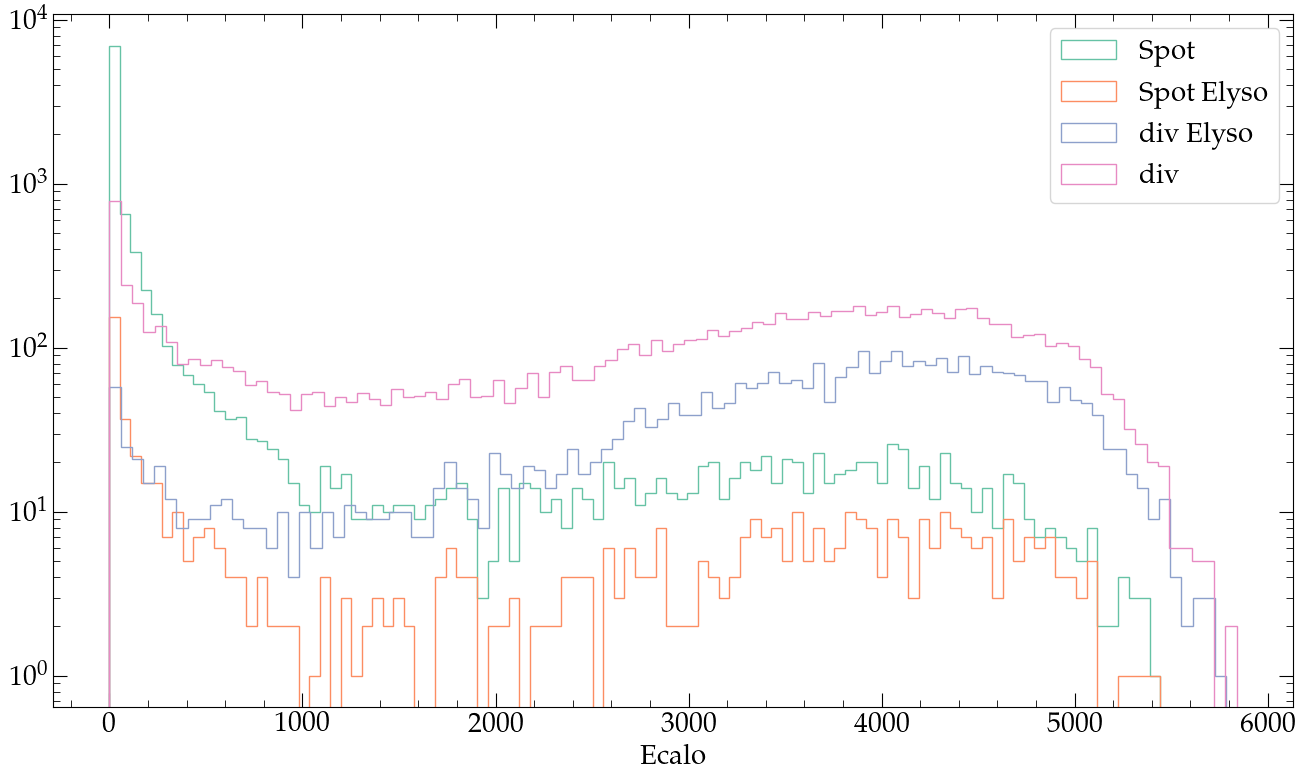

In [100]:
angle = 0 
a = plt.hist(pq_sim[angle]['Ecalo'], histtype = 'step',bins = 100, label = 'Spot')
a = plt.hist(pq_sim[angle].query('Elyso>0')['Ecalo'], histtype = 'step',bins = 100, label = 'Spot Elyso')
a = plt.hist(pq_sim_1e3[angle].query('Elyso>0')['Ecalo'], histtype = 'step',bins = 100, label = 'div Elyso')
a = plt.hist(pq_sim_1e3[angle]['Ecalo'], histtype = 'step',bins = 100, label = 'div')
plt.legend()
plt.xlabel('Ecalo')
plt.yscale('log')

In [91]:
make_all_distr('c_over_s_sipm_c')

In [272]:
make_all_distr('Q_data_sipm_s_Q_data_sipm_s')

In [ ]:
make_all_distr('Q_data_sipm_s_Q_data_sipm_s', logy = True)

In [ ]:
make_all_distr('t0_sipm_c', logy = True)
make_all_distr('t0_sipm_s', logy = True)


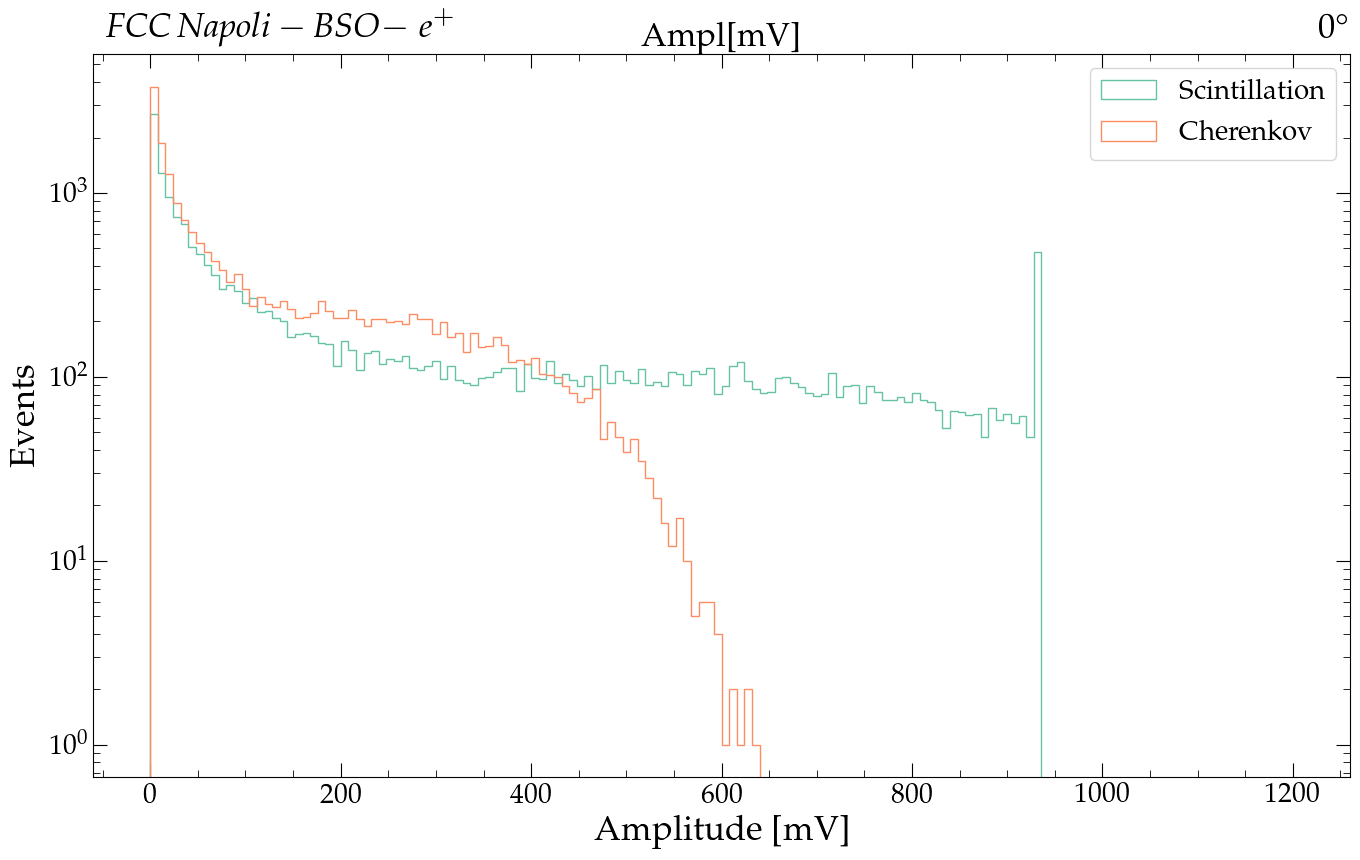

In [30]:
variable = 'amplitude_sipm_s'
palette = wesanderson.film_palette(film='Fox', palette=1)
for angle in [0]:
    titti = dict_plot[variable]['title']
    lalla = dict_plot[variable]['label']
    custom_plot_layout(title=titti, xlabel='Amplitude [mV]', ylabel="Events",  figsize=(14, 9), angle = angle, crystal = 'BSO', beam = beam_text)    
    for crystal in ['BSO']:
        array_1 = d[crystal][angle][variable]
        array_2 = d[crystal][angle][variable.replace('sipm_s','sipm_c')]
        plt.hist(array_1, range = dict_plot[variable]['range'], bins=150, histtype='step', linewidth=1, label='Scintillation')
        plt.hist(array_2, range = dict_plot[variable]['range'], bins=150, histtype='step', linewidth=1, label='Cherenkov')
    plt.legend()
    #plt.xlim(-50,25)
    plt.yscale('log')
    plt.tight_layout()
    plt.savefig(f'PaperFigures/{variable}_{angle}_BSO_FitDistributions.png')

# Mean Value

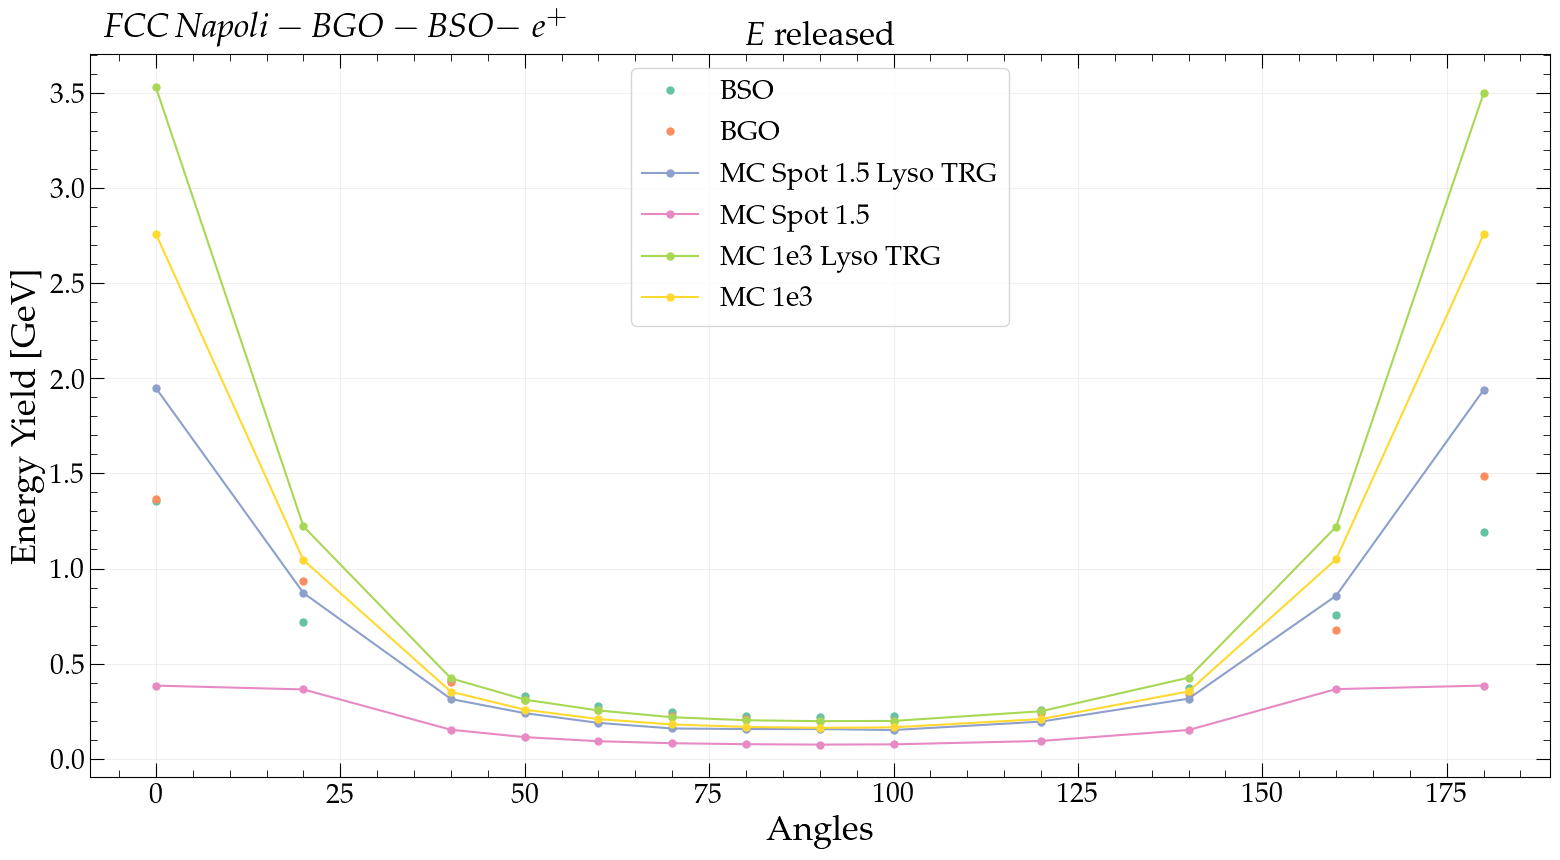

In [ ]:
y_values = {}
y_err = {}
variable = 'e'
for crystal in ['BSO', 'BGO']:
    y_values[crystal] = []
    y_err[crystal] = []
    for angle in angles:
        if angle in [110, 130]:
            continue
        y_values[crystal].append(np.mean(d_filter[crystal][angle][variable]))
        

custom_plot_layout(title=dict_plot[variable]['title'], xlabel='Angles', ylabel=dict_plot[variable]['label'],  figsize=(16, 9), crystal = 'BGO-BSO', beam = beam_text)
for crystal in ['BSO', 'BGO']:
    plt.errorbar(pq_sim.keys(), y_values[crystal], label = crystal, fmt = 'o')

a = []
b = []
b_2 = []
b_3 = []
b_4 = []
for angle, values in pq_sim.items():
    a.append(angle)
    b.append(np.mean(values.query('Elyso > 0')['Ecalo'])/1000)
    b_2.append(np.mean(values['Ecalo'])/1000)
    b_3.append(np.mean(pq_sim_1e3[angle].query('Elyso > 0')['Ecalo'])/1000)
    b_4.append(np.mean(pq_sim_1e3[angle]['Ecalo'])/1000)
plt.errorbar(a, b, fmt = 'o-', label = 'MC Spot 1.5 Lyso TRG')
plt.errorbar(a, b_2, fmt = 'o-', label = 'MC Spot 1.5')
plt.errorbar(a, b_3, fmt = 'o-', label = 'MC 1e3 Lyso TRG')
plt.errorbar(a, b_4, fmt = 'o-', label = 'MC 1e3')
#plt.errorbar(a, b_2, yerr = b_2_err, color = palettes[1], fmt = 'o', label = 'From Simulation PS = 1.1cm')
plt.grid()
plt.legend(loc = 'upper center')
plt.tight_layout()

In [ ]:
a = []
b = []
b_err = []
b_2_err = []
b_2 = []
for angle, values in pq_sim.items():
    a.append(angle)
    b.append(np.mean(values))
    b_err.append(np.std(values)/np.sqrt(len(values)))

# Creazione della figura con due subplot (uno sopra l'altro)
fig, ax = plt.subplots(2, 1, figsize=(16, 12), sharex=True, gridspec_kw={'height_ratios': [2, 1]})


# PRIMO PLOT: Valori originali con barre d'errore
for crystal in ['BGO']:
    ax[0].errorbar(pq_sim.keys(), y_values[crystal], yerr=y_err[crystal], color=color[crystal], label=crystal, fmt='o')

ax[0].errorbar(a, b, yerr=b_err, color=palettes[2], fmt='o', label='From Simulation')
ax[0].set_ylabel(y_axis[variable])
ax[0].set_title(titles[variable])
ax[0].legend()
ax[0].grid()

# SECONDO PLOT: Rapporto tra Misura e Simulazione
ratio = np.array(y_values['BGO']) / np.array(b)
ratio_err = ratio * np.sqrt((np.array(y_err['BGO']) / np.array(y_values['BGO']))**2 + (np.array(b_err) / np.array(b))**2)

ax[1].errorbar(a, ratio, yerr=ratio_err, fmt='o', color='red', label='')
ax[1].axhline(y=1, color='black', linestyle='-')
ax[1].set_xlabel('Angles')
ax[1].set_ylabel('E_BSO / Simulazione')
ax[1].grid()

plt.tight_layout()
plt.show()


NameError: name 'Ecalo' is not defined

In [260]:
b_2[0]/b[0]

0.9603558909702121

In [173]:
print(y_err[crystal])

[0.0001780988972065618, 7.888846819083186e-05, 7.377136393884805e-05, 5.1537546532800913e-05, 5.036390122351994e-05, 5.046815934425371e-05, 5.1908269630439346e-05, 5.294747056652157e-05, 5.4762259214684584e-05, 5.608660428754505e-05, 5.572463439937399e-05, 5.795179501765183e-05]


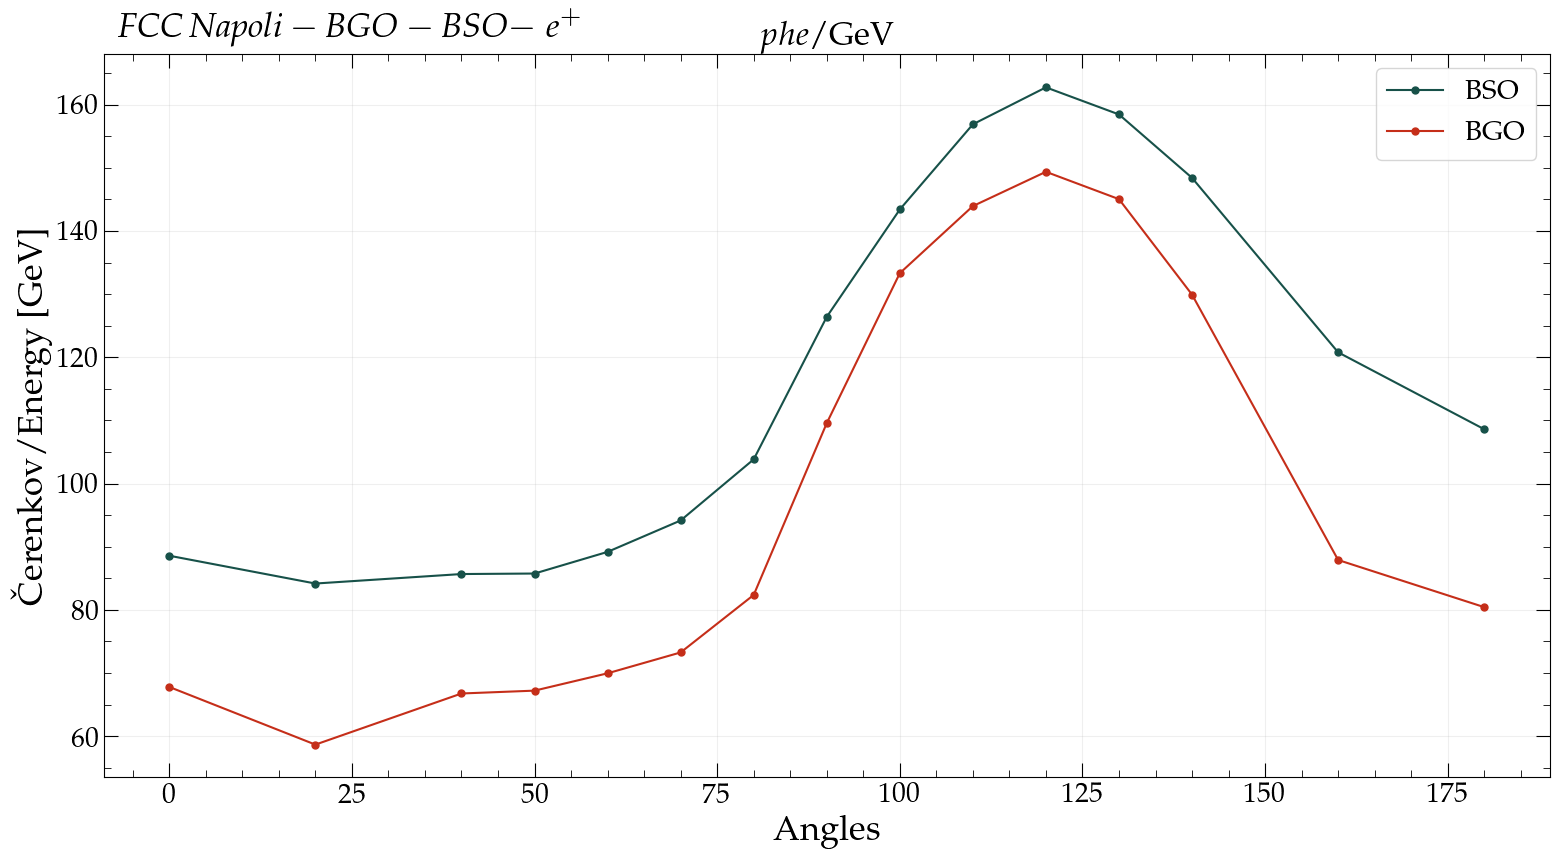

In [24]:
variable = 'c_over_e'
y_values = {}
for crystal in ['BSO']:
    y_values[crystal] = []
    for angle in angles:
        y_values[crystal].append(np.mean(d_filter[crystal][angle][variable]))
        

custom_plot_layout(title=titles[variable], xlabel='Angles', ylabel=y_axis[variable],  figsize=(16, 9), crystal = 'BGO-BSO', beam = beam_text)
for crystal in ['BSO']:
    plt.plot(angles, y_values[crystal], color = color[crystal], label = crystal, marker = 'o')


for crystal in ['BGO']:
    y_values[crystal] = []
    for angle in angles:
        y_values[crystal].append(np.mean(d_filter[crystal][angle][variable]))
        
for crystal in ['BGO']:
    plt.plot(angles, y_values[crystal], color = color[crystal], label = crystal, marker = 'o')
    
#plt.plot(Ecalo.keys(), Ecalo.values(), color = palettes[2], marker = 'o', label = 'From Simulation')
plt.grid()
plt.legend()
plt.tight_layout()


In [ ]:
for crystal in ['BGO', 'BSO']:
    for ch in [2]:
        images = []
        for angle in df[ch][crystal].keys():
            title = "Scintillation Channel" if ch == 1 else "Čerenkov channel"
            custom_plot_layout(title=title, xlabel="Cherenkov/Scintillation Ratio", ylabel="Events",  figsize=(21, 9), angle = angle, crystal = crystal, beam = beam_text)
            plt.hist(df[ch][crystal][angle]['c_over_s'], range = (0, 5), bins = 500, color = color[crystal])
            plt.draw()
            fig = plt.gcf()
            fig.canvas.draw()
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            images.append(Image.fromarray(image))
            plt.tight_layout()
            plt.savefig(f'Hardware_Fit/figures/more_figures/{crystal}_{angle}_c_over_s_{ch}.png', dpi = 300)
            plt.close(fig)
        images[0].save(f'Hardware_Fit/figures/{crystal}_c_over_s_{ch}.gif', save_all=True, append_images=images[1:], duration=500, loop=1)

/tmp/ggaudino/ipykernel_152340/1460985239.py:11: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
/tmp/ggaudino/ipykernel_152340/1460985239.py:11: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


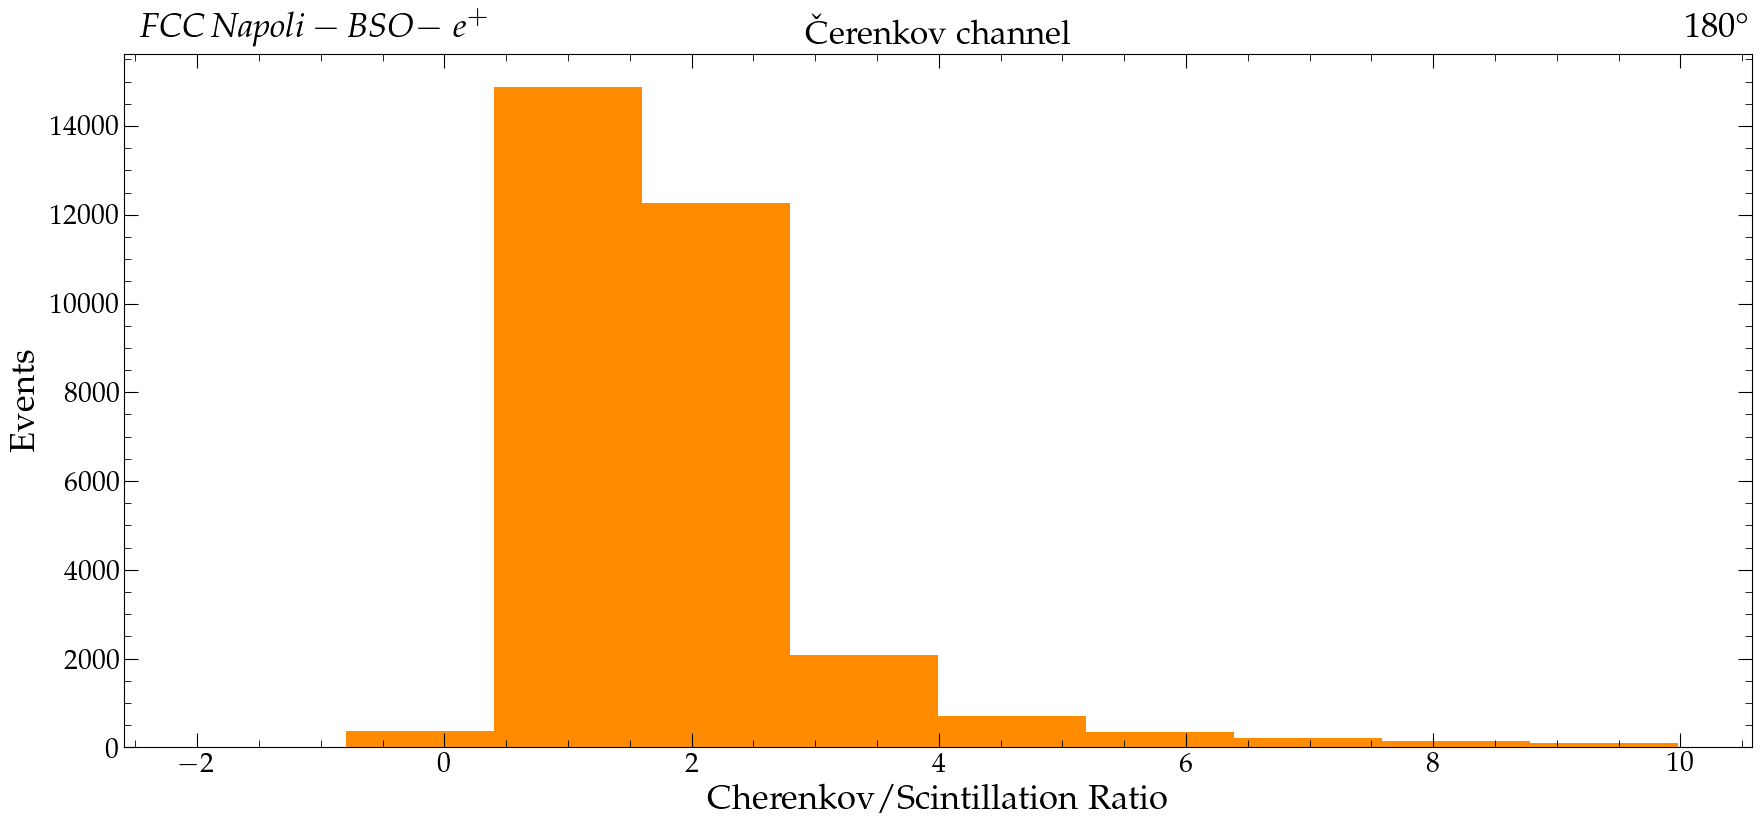

In [80]:
ch = 2
crystal = 'BSO'
angle = 180
custom_plot_layout(title=title, xlabel="Cherenkov/Scintillation Ratio", ylabel="Events",  figsize=(21, 9), angle = angle, crystal = crystal, beam = beam_text)
plt.hist(df[ch][crystal][angle]['c_over_s'], color = color[crystal])
plt.draw()

In [14]:
for ch in [2]:
    images = []
    for angle in df[ch].keys():
        title = "Scintillation Channel" if ch == 1 else "Čerenkov channel"
        custom_plot_layout(title=f'Laser template - Channel {ch}', xlabel="Čerenkov Yield [p.e.]", ylabel="Events",  figsize=(21, 9), angle = angle, crystal = crystal, beam = beam_text)
        plt.hist(df[ch][angle]['c'], range = (0, 1000), bins = 500, color = 'darkcyan')
        plt.draw()
        fig = plt.gcf()
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        images.append(Image.fromarray(image))
        plt.tight_layout()
        plt.savefig(f'Hardware_Fit/figures/more_figures/Laser_{angle}_c_Ch{ch}.png', dpi = 300)
        plt.close(fig)
    #images[0].save(f'Hardware_Fit/figures/Laser_angle_scan_c_Ch{ch}.gif', save_all=True, append_images=images[1:], duration=500, loop=1)

/tmp/ggaudino/ipykernel_3762614/334629433.py:10: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
/tmp/ggaudino/ipykernel_3762614/334629433.py:10: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
/tmp/ggaudino/ipykernel_3762614/334629433.py:10: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


In [15]:
for ch in [2]:
    images = []
    for angle in df[ch].keys():
        title = "Scintillation Channel" if ch == 1 else "Čerenkov channel"
        custom_plot_layout(title=f'Laser template - Channel {ch}', xlabel="Scintillation Yield [p.e.]", ylabel="Events",  figsize=(21, 9), angle = angle, crystal = crystal, beam = beam_text)
        plt.hist(df[ch][angle]['s'], range = (0, 1000), bins = 500, color = 'darkcyan')
        plt.draw()
        fig = plt.gcf()
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        images.append(Image.fromarray(image))
        plt.tight_layout()
        plt.savefig(f'Hardware_Fit/figures/more_figures/Laser_{angle}_s_Ch{ch}.png', dpi = 300)
        plt.close(fig)
    #images[0].save(f'Hardware_Fit/figures/Laser_angle_scan_c_Ch{ch}.gif', save_all=True, append_images=images[1:], duration=500, loop=1)

/tmp/ggaudino/ipykernel_3762614/2643705153.py:10: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
/tmp/ggaudino/ipykernel_3762614/2643705153.py:10: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
/tmp/ggaudino/ipykernel_3762614/2643705153.py:10: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


In [22]:
images = []
for angle in angles: 
    custom_plot_layout(title="", xlabel=r"$\chi^2$ values", ylabel="Events",  figsize=(21, 9), angle = angle, crystal = crystal, beam = beam_text)
    plt.hist(df[angle]['chi2'], range= (0, 5000000), bins = 200,  color = 'royalblue')
    plt.draw()
    fig = plt.gcf()
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(Image.fromarray(image))
    plt.savefig(f'Hardware_Fit/figures/more_figures/{angle}_chi2.png', dpi = 300)
    plt.close(fig)
images[0].save('Hardware_Fit/figures/angle_scan_chi2_yield.gif', save_all=True, append_images=images[1:], duration=500, loop=1)

/tmp/ggaudino/ipykernel_1568385/882182727.py:8: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


# Angle Scan

## Cose Inutili

## Cose Utili

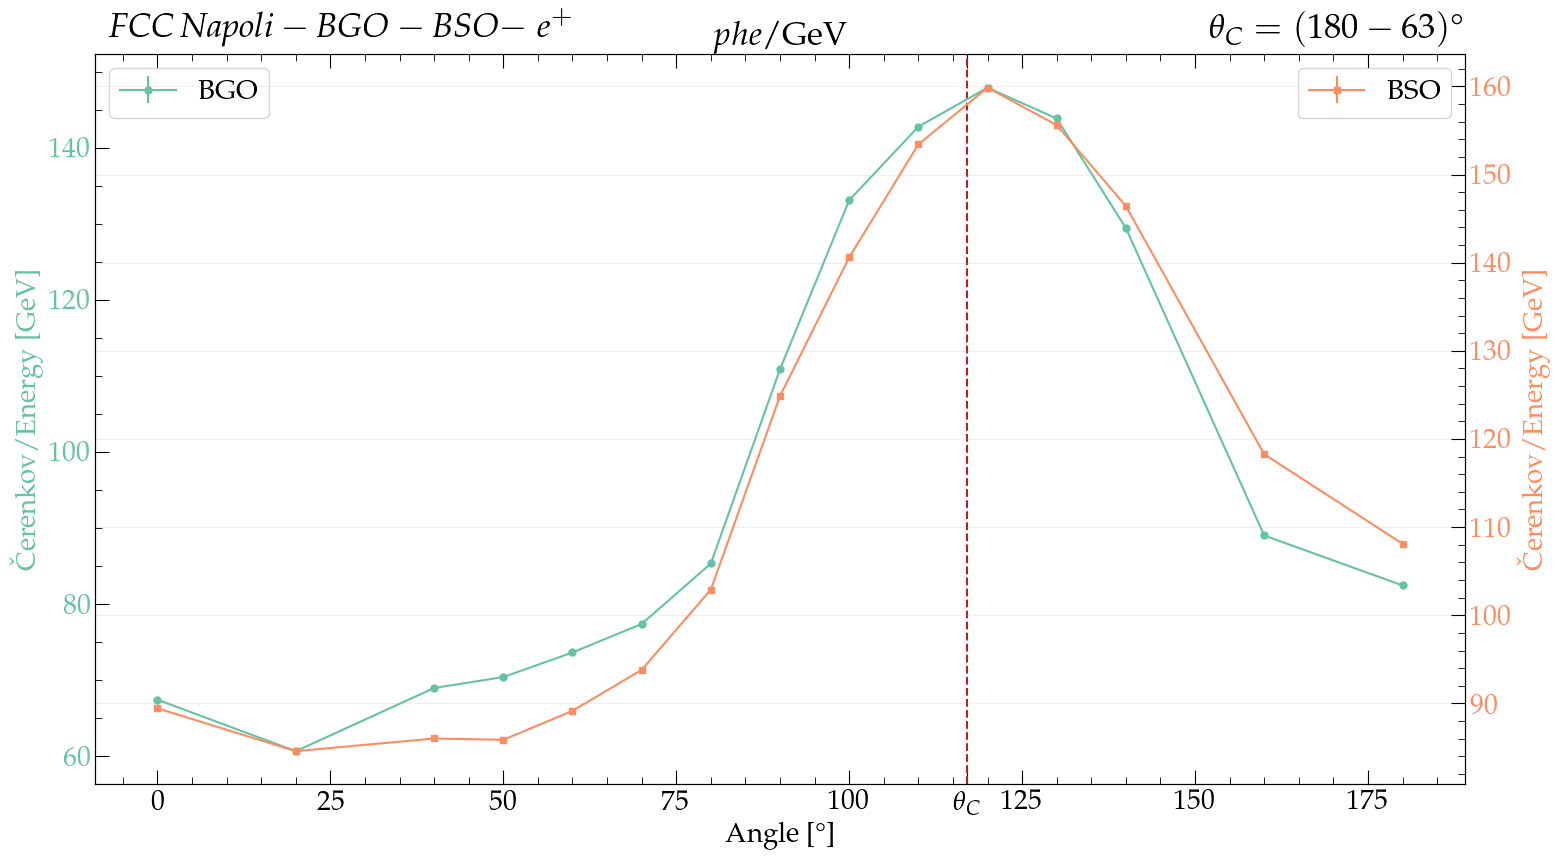

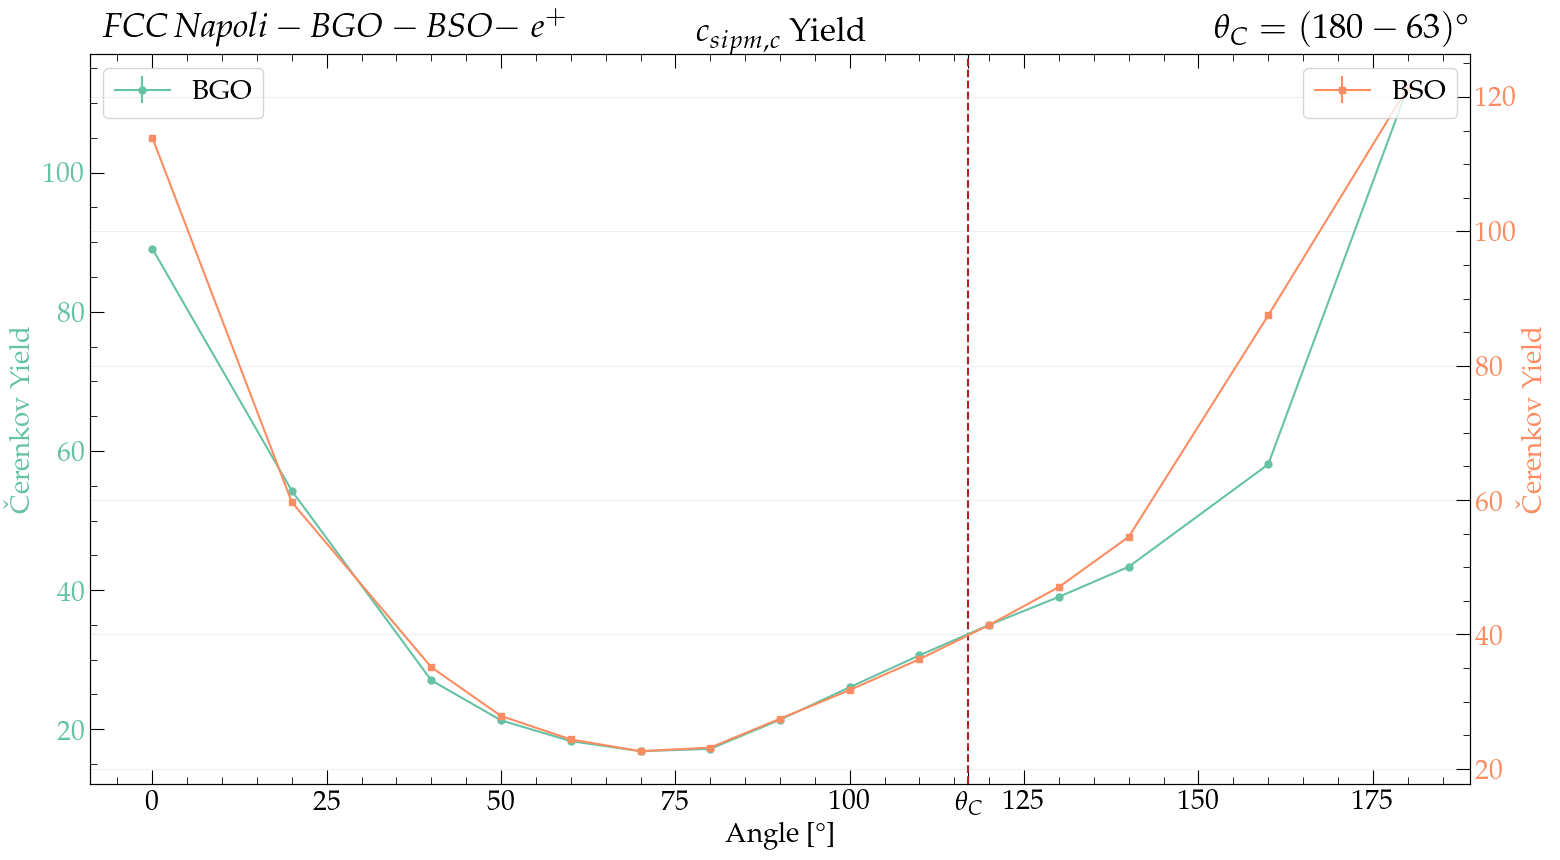

In [38]:
variables_list = ['c_over_e', 'c_sipm_c']
for variable in variables_list:
    lists = {}
    angles_list = {}
    errors_lists = {}
    for crystal in ['BGO', 'BSO']:
        lists[crystal] = []
        errors_lists[crystal] = []
        angles_list[crystal] = []
        for angle in angles:
            if variable == 'c_over_Esim' and angle in [110, 130]:
                continue
            angles_list[crystal].append(angle)
            lists[crystal].append(np.mean(d_filter[crystal][angle][variable]))
            errors_lists[crystal].append(0)#np.std(d_filter[crystal][angle][variable]))


    fig, ax1 = plt.subplots(figsize=(16, 9))

    string_top_left = f"$\it FCC\,Napoli - BGO-BSO -$" + f" {beam_text}"
    string_top_right = r"$\theta_C = (180-63)$°"
        
    plt.text(0.01, 1.01, string_top_left, transform=plt.gca().transAxes, fontsize=25,  fontstyle = 'italic', fontfamily = 'serif', verticalalignment='bottom', horizontalalignment='left')
    plt.text(1, 1.01, string_top_right, transform=plt.gca().transAxes, fontsize=25,  fontstyle = 'italic', fontfamily = 'serif', verticalalignment='bottom', horizontalalignment='right')

    ax1.set_xlabel("Angle [°]")
    ax1.set_ylabel(dict_plot[variable]['label'], color=pastel_colors[0])
    ax1.errorbar(angles_list['BGO'], lists['BGO'], yerr = errors_lists['BGO'], color=pastel_colors[0], marker='o', label='BGO')
    ax1.tick_params(axis='y', labelcolor=pastel_colors[0])
    ax1.axvline(180-63, color='firebrick', linestyle='--')  # Linea verticale senza label
    ax1.set_xticks(list(ax1.get_xticks()) + [180-63])  # Aggiunge 63 ai tick esstenti
    ax1.set_xticklabels([r'$\theta_C$' if x == (180-63) else f'{x:.0f}' for x in ax1.get_xticks()])
    plt.legend(loc = 'upper left')


    ax2 = ax1.twinx()  
    ax2.set_ylabel(dict_plot[variable]['label'], color=pastel_colors[1])
    ax2.errorbar(angles_list['BSO'], lists['BSO'], yerr = errors_lists['BSO'], color=pastel_colors[1], marker='s', label='BSO')
    ax2.tick_params(axis='y', labelcolor=pastel_colors[1])
    plt.legend(loc = 'upper right')

    plt.title(dict_plot[variable]['title'])
    fig.tight_layout()

    plt.grid()

    plt.savefig(f'PaperFigures/Angle_scan_twoax_{variable}_{beam}.png', dpi=300)



In [223]:
for variable in ['e']:#variables_list:
    lists = {}
    angles_list = {}
    for crystal in ['BGO', 'BSO']:
        lists[crystal] = []
        angles_list[crystal] = []
        for angle in df[ch][crystal].keys():
            if variable == 'c_over_Esim' and angle in [110, 130]:
                continue
            angles_list[crystal].append(angle)
            lists[crystal].append(np.mean(d_filter[crystal][angle][variable]))


    fig, ax1 = plt.subplots(figsize=(16, 9))

    string_top_left = f"$\it FCC\,Napoli - BGO-BSO -$" + f" {beam_text}"
    string_top_right = r"$\theta_C = (180-63)$°"
        
    plt.text(0.01, 1.01, string_top_left, transform=plt.gca().transAxes, fontsize=25,  fontstyle = 'italic', fontfamily = 'serif', verticalalignment='bottom', horizontalalignment='left')
    plt.text(1, 1.01, string_top_right, transform=plt.gca().transAxes, fontsize=25,  fontstyle = 'italic', fontfamily = 'serif', verticalalignment='bottom', horizontalalignment='right')

    plt.xlabel("Angle [°]")
    plt.ylabel(dict_plot[variable]['label'])
    plt.errorbar(angles_list['BGO'], lists['BGO'], color=color['BGO'], marker='o', label='BGO')
    plt.errorbar(angles_list['BSO'], lists['BSO'], color=color['BSO'], marker='s', label='BSO')
    '''
    if variable == 'e':
        list_1 = []
        list_2 = []
        for a in Ecalo.keys():
            list_1.append(np.mean(Ecalo[a]))
            list_2.append(np.mean(Ecalo_ps[a]))
            
        plt.plot(Ecalo.keys(), list_1, color = palette[1], marker = 's', label = 'Simulation')
        plt.plot(Ecalo.keys(), list_2, color = palette[2], marker = 's', label = 'Simulation PS = 1.1cm')
    '''
    
    plt.axvline(180-63, color='firebrick', linestyle='--')  # Linea verticale senza label
    plt.xticks(list(ax1.get_xticks()) + [180-63])  # Aggiunge 63 ai tick esistenti
    ax1.set_xticklabels([r'$\theta_C$' if x == (180-63) else f'{x:.0f}' for x in ax1.get_xticks()])

    plt.legend(loc = 'best')

    plt.title(dict_plot[variable]['title'])
    fig.tight_layout()

    plt.grid()
    plt.savefig(f'PaperFigures/Angle_scan_oneax_{variable}_{beam}.png', dpi=300)

    plt.close()
    
'''
    custom_plot_layout(title='Fit on Channel 2', ylabel="Čerenkov/Scintillation Ratio", xlabel="Angle [°]",  figsize=(16, 9), crystal = crystal, beam = beam_text)
for crystal in ['BGO', 'BSO']:
    plt.errorbar(angles[crystal], c_s_list[crystal], color = color[crystal], marker = 'o', label = crystal)
plt.tight_layout()
plt.legend()
plt.yscale('log')
plt.savefig(f'Hardware_Fit/figures/Angle_scan_LaserTemplate_{ch}_{beam}.png', dpi = 300)
'''


'\n    custom_plot_layout(title=\'Fit on Channel 2\', ylabel="Čerenkov/Scintillation Ratio", xlabel="Angle [°]",  figsize=(16, 9), crystal = crystal, beam = beam_text)\nfor crystal in [\'BGO\', \'BSO\']:\n    plt.errorbar(angles[crystal], c_s_list[crystal], color = color[crystal], marker = \'o\', label = crystal)\nplt.tight_layout()\nplt.legend()\nplt.yscale(\'log\')\nplt.savefig(f\'Hardware_Fit/figures/Angle_scan_LaserTemplate_{ch}_{beam}.png\', dpi = 300)\n'

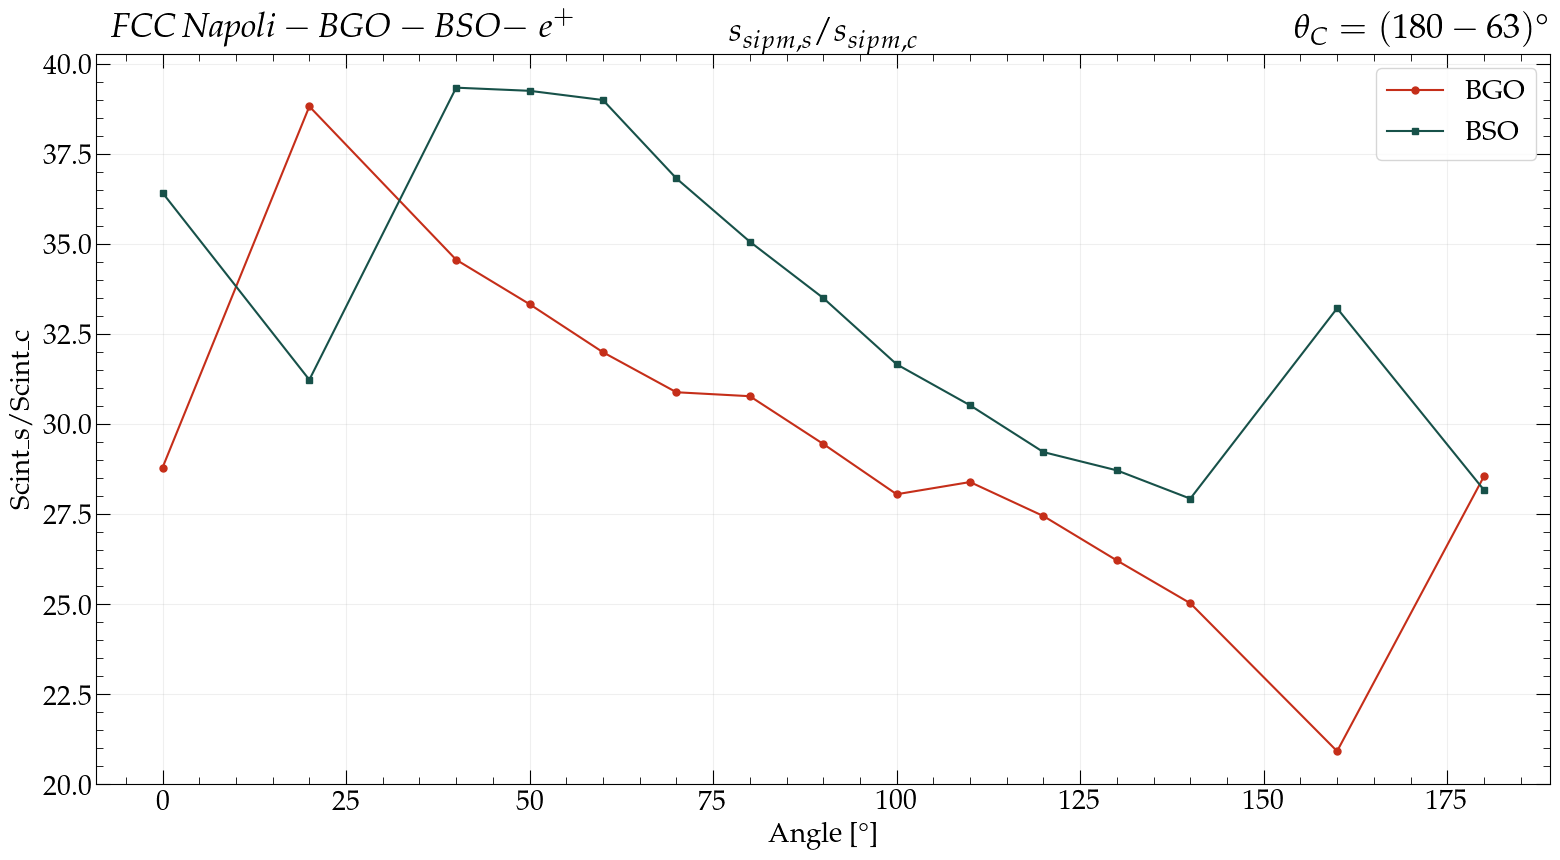

In [140]:
variable = 's_s_over_s_c'
lists = {}
angles_list = {}
for crystal in ['BGO', 'BSO']:
    lists[crystal] = []
    angles_list[crystal] = []
    for angle in angles:
        angles_list[crystal].append(angle)
        lists[crystal].append(np.mean(d_filter[crystal][angle]['s_sipm_s'])/np.mean(d_filter[crystal][180 - angle]['s_sipm_c']))


fig, ax1 = plt.subplots(figsize=(16, 9))

string_top_left = f"$\it FCC\,Napoli - BGO-BSO -$" + f" {beam_text}"
string_top_right = r"$\theta_C = (180-63)$°"
    
plt.text(0.01, 1.01, string_top_left, transform=plt.gca().transAxes, fontsize=25,  fontstyle = 'italic', fontfamily = 'serif', verticalalignment='bottom', horizontalalignment='left')
plt.text(1, 1.01, string_top_right, transform=plt.gca().transAxes, fontsize=25,  fontstyle = 'italic', fontfamily = 'serif', verticalalignment='bottom', horizontalalignment='right')

plt.xlabel("Angle [°]")
plt.ylabel(dict_plot[variable]['label'])
plt.errorbar(angles_list['BGO'], lists['BGO'], color=color['BGO'], marker='o', label='BGO')
plt.errorbar(angles_list['BSO'], lists['BSO'], color=color['BSO'], marker='s', label='BSO')

plt.legend(loc = 'best')

plt.title(dict_plot[variable]['title'])
fig.tight_layout()

plt.grid()
plt.show()


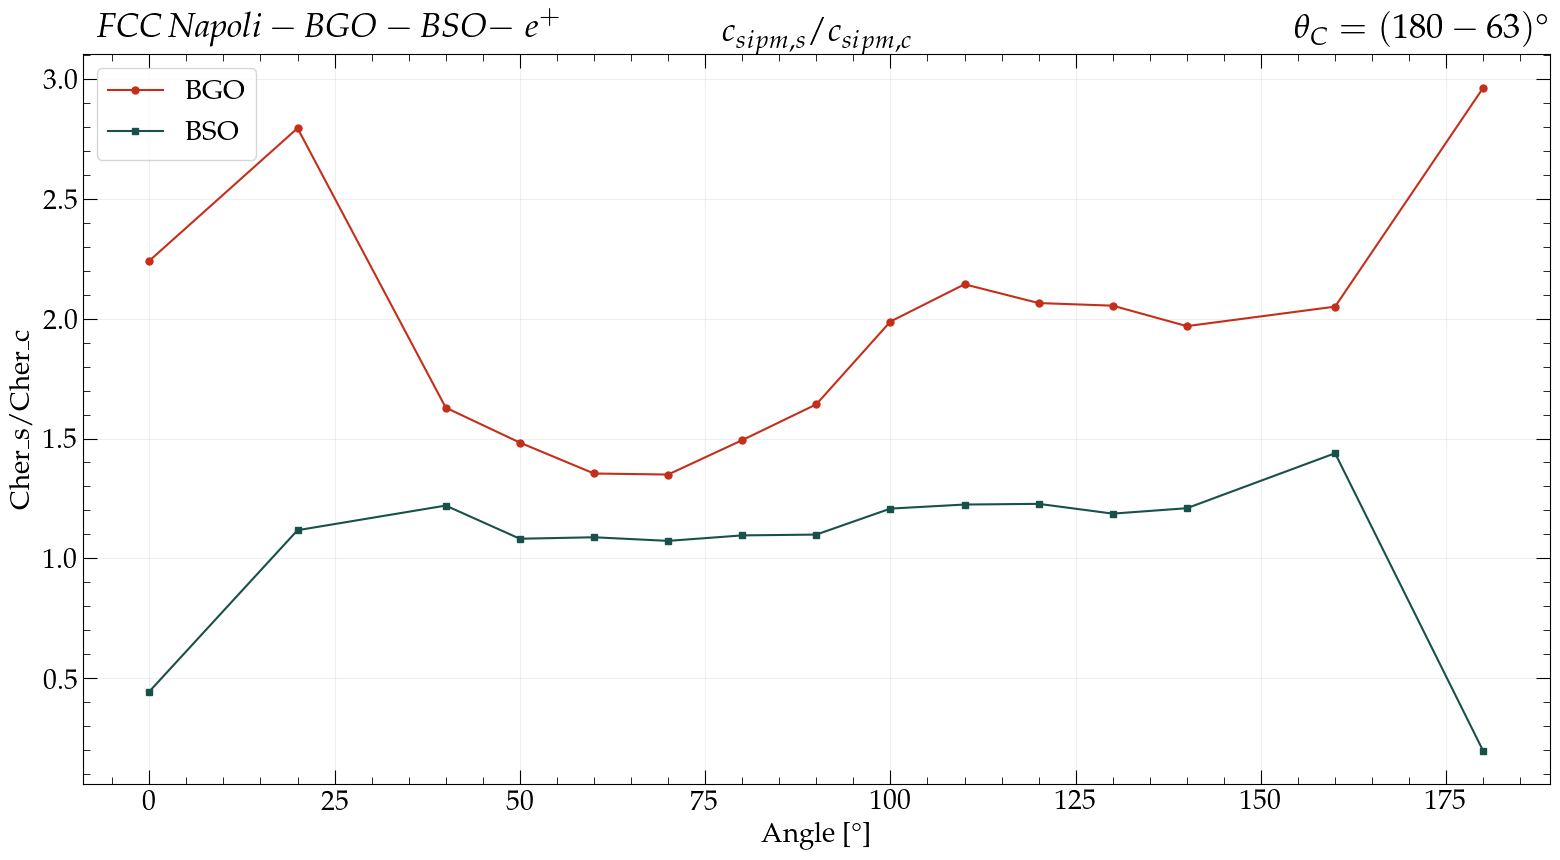

In [141]:
variable = 'c_s_over_c_c'
lists = {}
angles_list = {}
for crystal in ['BGO', 'BSO']:
    lists[crystal] = []
    angles_list[crystal] = []
    for angle in angles:
        angles_list[crystal].append(angle)
        lists[crystal].append(np.mean(d_filter[crystal][angle]['c_sipm_s'])/np.mean(d_filter[crystal][180 - angle]['c_sipm_c']))


fig, ax1 = plt.subplots(figsize=(16, 9))

string_top_left = f"$\it FCC\,Napoli - BGO-BSO -$" + f" {beam_text}"
string_top_right = r"$\theta_C = (180-63)$°"
    
plt.text(0.01, 1.01, string_top_left, transform=plt.gca().transAxes, fontsize=25,  fontstyle = 'italic', fontfamily = 'serif', verticalalignment='bottom', horizontalalignment='left')
plt.text(1, 1.01, string_top_right, transform=plt.gca().transAxes, fontsize=25,  fontstyle = 'italic', fontfamily = 'serif', verticalalignment='bottom', horizontalalignment='right')

plt.xlabel("Angle [°]")
plt.ylabel(dict_plot[variable]['label'])
plt.errorbar(angles_list['BGO'], lists['BGO'], color=color['BGO'], marker='o', label='BGO')
plt.errorbar(angles_list['BSO'], lists['BSO'], color=color['BSO'], marker='s', label='BSO')

plt.legend(loc = 'best')

plt.title(dict_plot[variable]['title'])
fig.tight_layout()

plt.grid()
plt.show()


# Data/MC Comparison

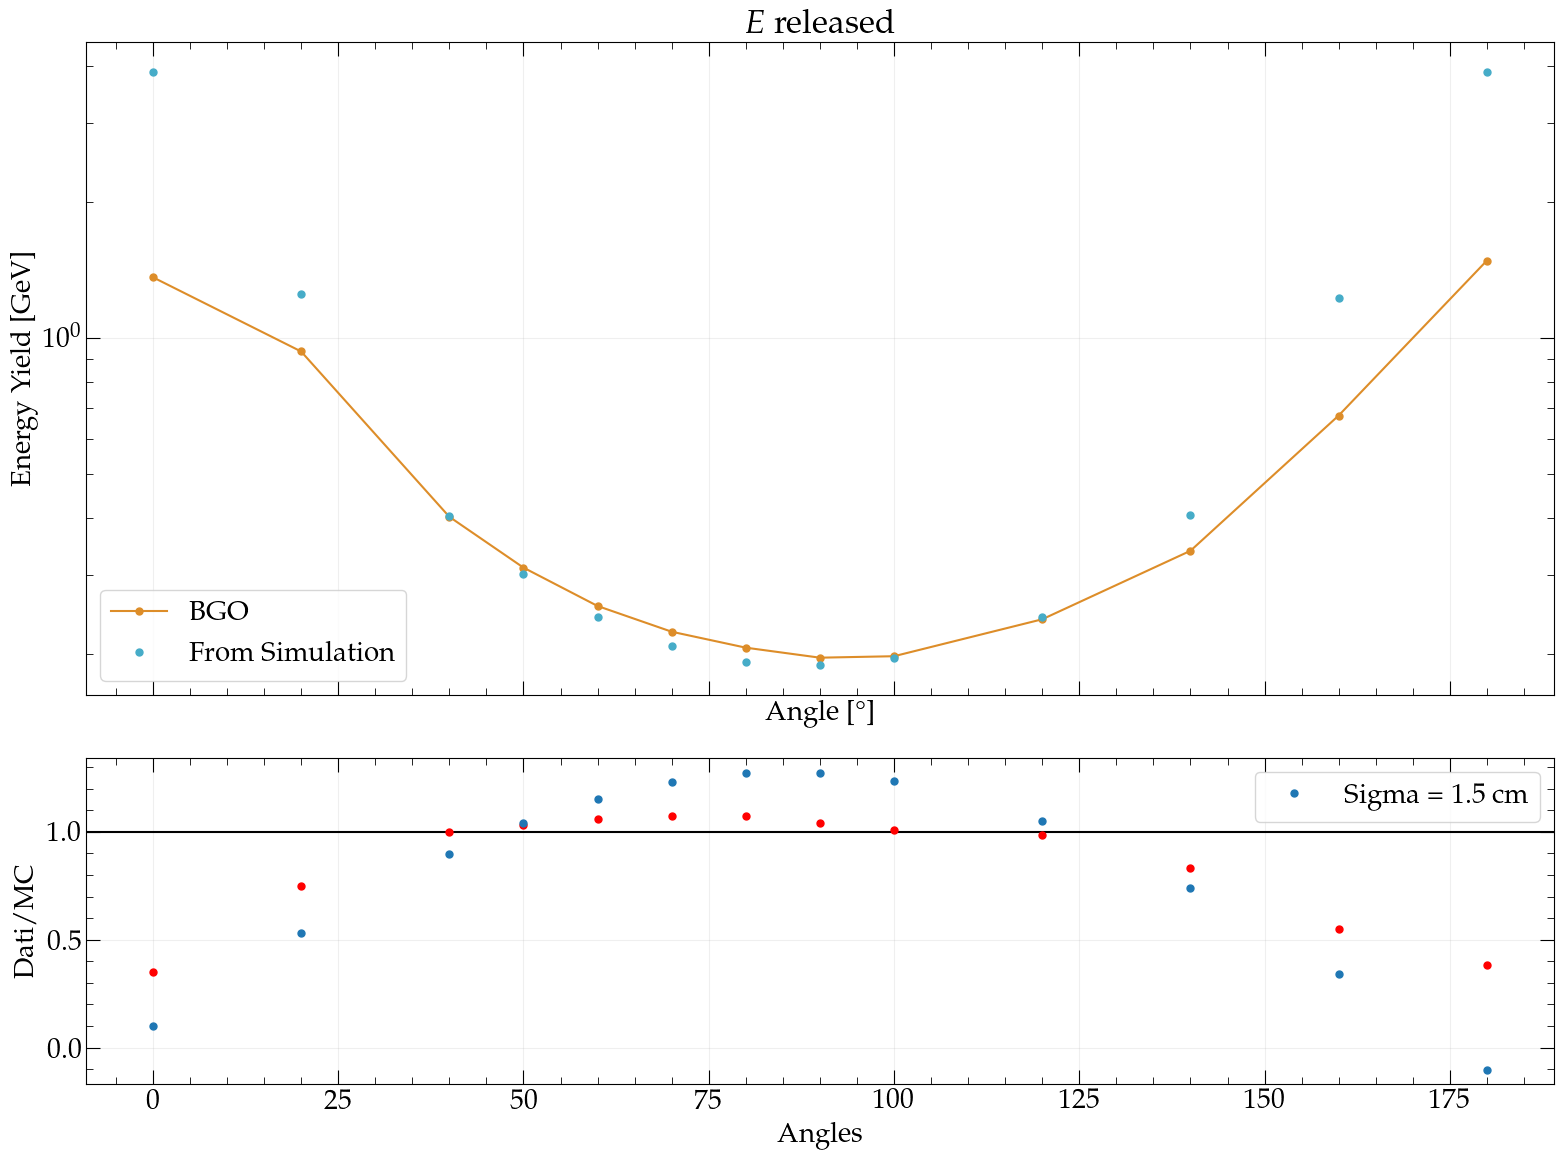

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(16, 12), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

variable = 'e'
lists = {}
angles_list = {}
for crystal in ['BGO']:
    lists[crystal] = []
    angles_list[crystal] = []
    for angle in angles:
        if angle in [110, 130]:
            continue
        angles_list[crystal].append(angle)
        lists[crystal].append(np.mean(d_filter[crystal][angle][variable]))



string_top_left = f"$\it FCC\,Napoli - BGO -$" + f" {beam_text}"
string_top_right = r"$\theta_C = (180-63)$°"
    
#ax[0].text(0.01, 1.01, string_top_left, transform=plt.gca().transAxes, fontsize=25,  fontstyle = 'italic', fontfamily = 'serif', verticalalignment='bottom', horizontalalignment='left')
#ax[0].text(1, 1.01, string_top_right, transform=plt.gca().transAxes, fontsize=25,  fontstyle = 'italic', fontfamily = 'serif', verticalalignment='bottom', horizontalalignment='right')

ax[0].set_xlabel("Angle [°]")
ax[0].set_ylabel(dict_plot[variable]['label'])
ax[0].errorbar(angles_list['BGO'], lists['BGO'], color=color['BGO'], marker='o', label='BGO')
#plt.errorbar(angles_list['BSO'], lists['BSO'], color=color['BSO'], marker='s', label='BSO')

a = []
b = []
b_err = []
b_2_err = []
b_2 = []
areas = []
areas_2 = []
for angle, values in pq_sim.items():
    a.append(angle)
    b.append(np.mean(values['Ecalo']/1000))
    areas.append(create_ratio_Areas(1.5, angle))
    areas_2.append(create_ratio_Areas(0.5, angle))
    #b_err.append(np.std(values['Ecalo'])/np.sqrt(len(values['Ecalo'])))
ax[0].errorbar(a, b, color = palettes[2], fmt = 'o', label = 'From Simulation')

ratio = np.array(lists['BGO']) / np.array(b)

ax[1].errorbar(a, ratio, fmt='o', color='red', label='')
ax[1].errorbar(a, areas, fmt = 'o', label = 'Sigma = 1.5 cm')
#ax[1].errorbar(a, areas_2, fmt = 'o', label = 'Sigma = 0.5 cm')
ax[1].axhline(y=1, color='black', linestyle='-')
ax[1].set_xlabel('Angles')
ax[1].set_ylabel('Dati/MC')
ax[1].grid()
ax[1].legend()

ax[0].legend(loc = 'best')

ax[0].set_title(dict_plot[variable]['title'])
fig.tight_layout()
ax[0].set_yscale('log')
ax[0].grid()


In [38]:
pq_sim_1p5 = pd.read_parquet(f'Hardware_Fit/parqs/e_BGO_10k_0_spot1p5.parq')

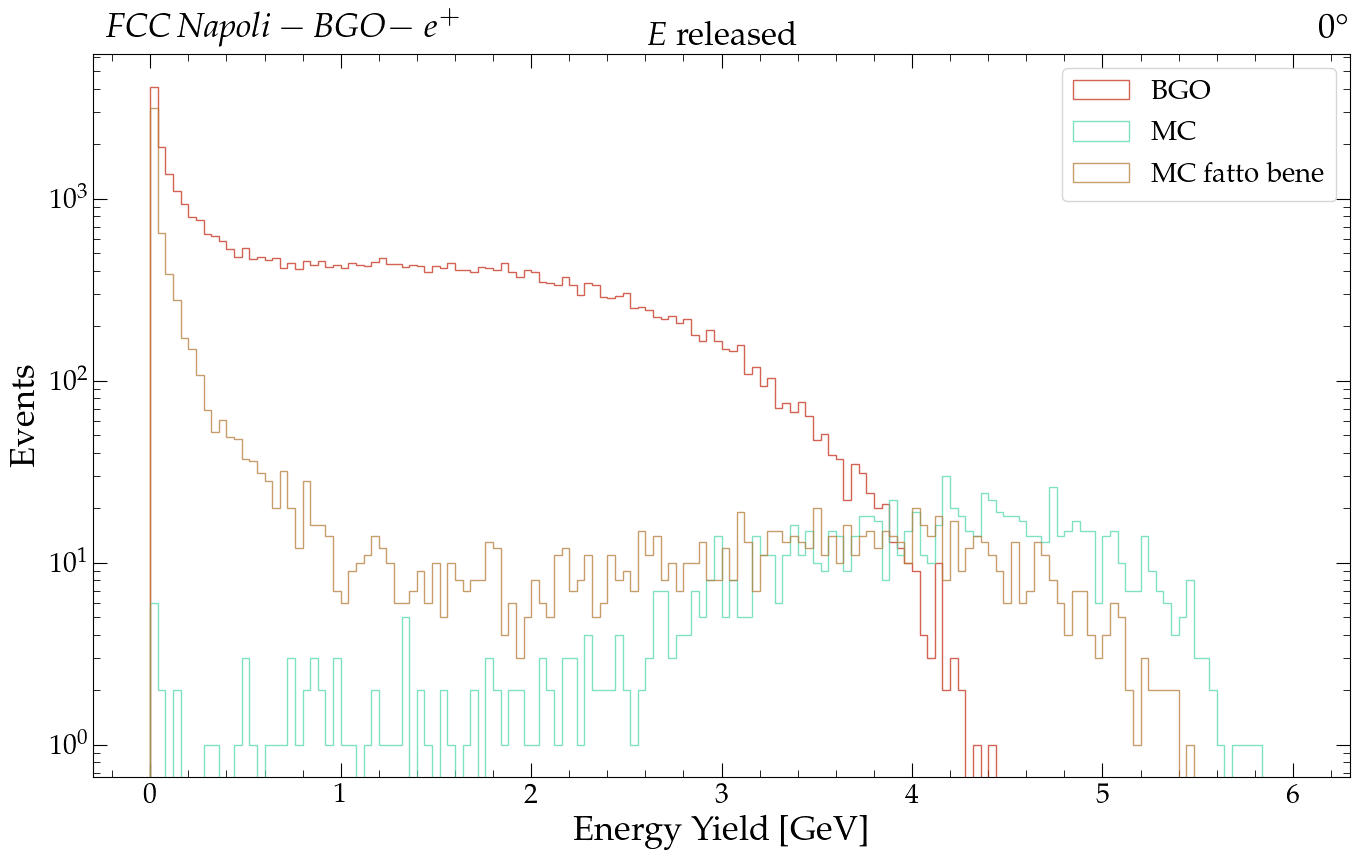

In [48]:
variable = 'e'
palette = wesanderson.film_palette(film='Asteroid', palette=1)
for angle in [0]:
    titti = dict_plot[variable]['title']
    lalla = dict_plot[variable]['label']
    custom_plot_layout(title=titti, xlabel=lalla, ylabel="Events",  figsize=(14, 9), angle = angle, crystal = 'BGO', beam = beam_text)    
    ranges = (0, 6)
    for crystal in ['BGO']:
        array_1 = d[crystal][angle][variable]
        plt.hist(array_1, range = ranges, bins=150, histtype='step', linewidth=1, label=crystal, alpha=0.75, color = palette[0 if crystal == 'BGO' else 4])
    #plt.xlim(-50,25)
    plt.hist(pq_sim[0]['Ecalo']/1000, range = ranges, bins=150, histtype='step', linewidth=1, label='MC', alpha=0.75, color = palette[2])
    plt.hist(pq_sim_1p5.query('Ecalo> 0')['Ecalo']/1000, range = ranges, bins=150, histtype='step', linewidth=1, label='MC fatto bene', alpha=0.75, color = palette[3])
    plt.legend()
    plt.yscale('log')
    plt.tight_layout()
    #plt.savefig(f'PaperFigures/{variable}_{angle}_BGO_FitDistributions.png')